In [61]:
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task description


**Task 1: Data Insights**
You have been provided with two datasets related to the Bolt Business platform. Your objective is to conduct a comprehensive analysis to uncover insights that will inform strategic decisions for Bolt Business. These insights should cater to the needs of top-level management, including Country Managers, Directors, and the VP of Bolt Business.
1. ***Acquisition Data***
- **Content**: Information about new companies registering on the Bolt Business platform.
- **Variables**:
    o Region (geographical location of the company) 
    o Acquisition Channel (how the company was acquired) 
    o Segment (company performance tier, ranging from Tier 0 to Tier 4) 
    o Acquisition Month (the month when the companies signed up) 
    o New Companies (number of companies that signed up)
1. ***Orders Data***
- **Content**: Details on orders and revenue generated per month.
- **Variables**:
    o Region, Acquisition Channel, Segment (as defined above) 
    o Order Month (the month when an order was placed) 
    o Active Companies (number of companies with at least one completed order)
    o Revenue (generated revenue) 
    o Orders (number of orders completed)

**Expected Deliverables**
- **Visualizations**: Create visuals that illustrate key trends and insights.
- **Calculations**: Perform quantitative analysis to support your observations.
- **Assumptions**:
- **Insights and Recommendations**: Provide a clear summary of your findings, highlighting actionable insights that could influence Bolt Business's strategy. Address the specific interests of the key stakeholders.

**Submission Format**
Your analysis should be compiled into a comprehensive report or presentation (Google office apps), including an introduction, methodology, findings, visual aids, and conclusions/recommendations section.

# Settings

In [62]:
sns.set_theme()

# Data mining

In [63]:
try:
    acq = pd.read_pickle('acq.pkl')
except FileNotFoundError:
    acq = pd.read_clipboard()
    acq.to_pickle(Path('acq.pkl'))

assert len(acq) == 1155, 'should be 1155 row'
assert acq['New Companies'].sum() == 11144, 'should be 11144 total'
acq['Acquisition month_dt'] = pd.to_datetime(acq['Acquisition month_dt'])

acq.head()

Region Acquisition Channel Tier Segment Acquisition month_dt  \
0    Novaria             Organic           T3           2024-02-01   
1  Seraphica            Outreach           T4           2024-02-01   
2    Valoria           Marketing           T4           2024-02-01   
3  Aquilonia           Marketing           T3           2024-02-01   
4    Novaria            Outreach           T4           2024-02-01   

   New Companies  
0              1  
1              1  
2              3  
3              2  
4              1

In [64]:
try:
    orders = pd.read_pickle('orders.pkl')
except FileNotFoundError:
    orders = pd.read_clipboard()
    orders.to_pickle(Path('orders.pkl'))

assert len(orders) == 1756, 'should be 1756 row'
assert orders['Active Companies'].sum() == 69510, 'should be 69510 total'
orders['Revenue'] = orders['Revenue'].str.replace(',','').astype(float)
assert round(orders['Revenue'].sum(), 1) == round(10_572_217.58, 1), 'should be 10_572_217.58 total'
assert orders['Orders'].sum() == 1_946_954, 'should be 1_946_954 total'
orders['Order month_dt'] = pd.to_datetime(orders['Order month_dt'])
orders['Revenue per Company'] = orders['Revenue'] / orders['Active Companies']
orders['Orders per Company'] = orders['Orders'] / orders['Active Companies']
orders['Avg order cost'] = orders['Revenue'] / orders['Orders']

orders.head()

Region Acquisition Channel Segment Order month_dt  Active Companies  \
0  Novaria            Outreach      T3     2024-03-01                 1   
1   Lumina           Marketing      T2     2024-03-01                 1   
2  Veridia            Outreach      T1     2024-03-01                 4   
3  Veridia             Organic      T3     2024-03-01                 3   
4  Veridia           Marketing      T3     2024-03-01                 7   

   Revenue  Orders  Revenue per Company  Orders per Company  Avg order cost  
0     4.36       2             4.360000            2.000000        2.180000  
1     3.20       1             3.200000            1.000000        3.200000  
2   163.22      22            40.805000            5.500000        7.419091  
3    21.97       3             7.323333            1.000000        7.323333  
4    59.44       8             8.491429            1.142857        7.430000

# EDA

## Acquisitions

In [65]:
primary_key = ['Region', 'Acquisition Channel', 'Tier Segment', 'Acquisition month_dt']
assert acq.set_index(primary_key).index.is_unique, 'found duplicates'

In [66]:
acq.describe()

Acquisition month_dt  New Companies
count                           1155    1155.000000
mean   2023-01-10 00:27:25.714285568       9.648485
min              2022-01-01 00:00:00       1.000000
25%              2022-07-01 00:00:00       2.000000
50%              2023-01-01 00:00:00       5.000000
75%              2023-08-01 00:00:00      12.000000
max              2024-02-01 00:00:00     158.000000
std                              NaN      13.466477

In [67]:
acq['Region'].value_counts(dropna=False)

Region
Veridia      192
Aquilonia    177
Lumina       177
Valoria      168
Solsticea    150
Novaria      148
Seraphica    143
Name: count, dtype: int64

In [68]:
acq['Tier Segment'].value_counts(dropna=False)

Tier Segment
T4    468
T3    434
T2    176
T1     71
T0      6
Name: count, dtype: int64

In [69]:
acq['Acquisition Channel'].value_counts(dropna=False)

Acquisition Channel
Outreach     498
Marketing    367
Organic      290
Name: count, dtype: int64

In [70]:
tmp = acq.groupby(['Region']).agg({'New Companies': 'sum'}).reset_index()
tmp.sort_values(by='New Companies', ascending=False).head()

Region  New Companies
6    Veridia           2911
1     Lumina           1852
0  Aquilonia           1710
4  Solsticea           1676
5    Valoria           1633

In [71]:
tmp = acq.groupby(['Acquisition Channel']).agg({'New Companies': 'sum'}).reset_index()
tmp.sort_values(by='New Companies', ascending=False).head()

Acquisition Channel  New Companies
2            Outreach           4683
1             Organic           4118
0           Marketing           2343

In [72]:
tmp = acq.groupby(['Tier Segment']).agg({'New Companies': 'sum'}).reset_index()
tmp.sort_values(by='New Companies', ascending=False).head()

Tier Segment  New Companies
4           T4           6359
3           T3           4192
2           T2            470
1           T1            117
0           T0              6

Text(0.5, 0.98, 'Companies')

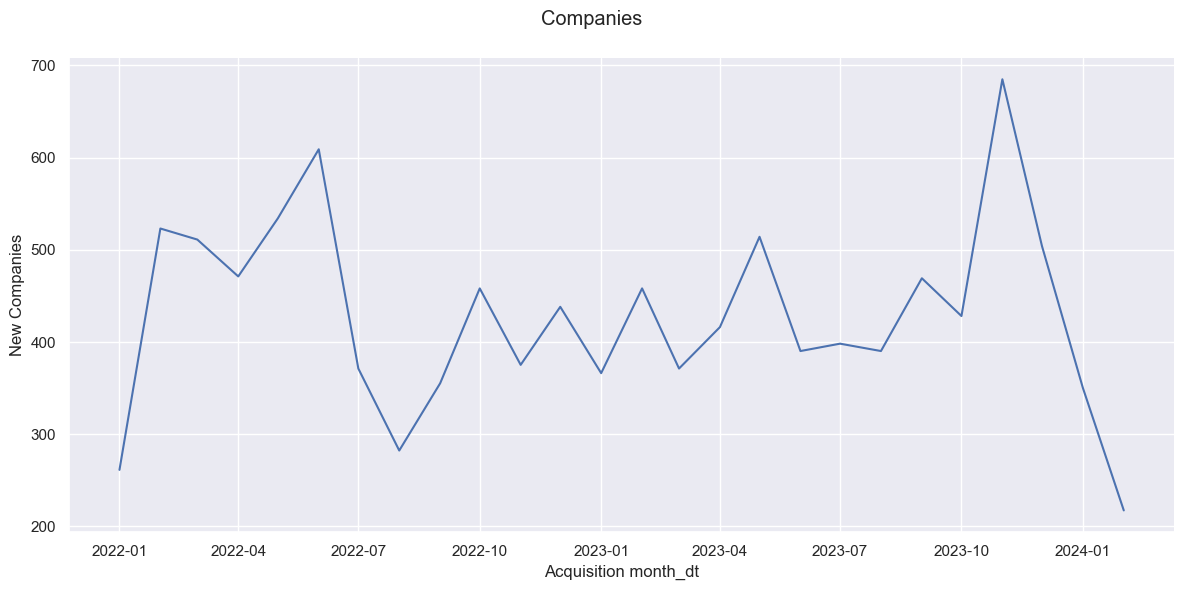

In [73]:
tmp = acq.groupby(['Acquisition month_dt']).agg({'New Companies': 'sum'}).reset_index()
tmp.head()

facet = sns.relplot(
    data=tmp,
    x='Acquisition month_dt',
    y='New Companies',
    kind='line',
    height=6,
    aspect=2
)

facet.figure.subplots_adjust(top=.9)
facet.figure.suptitle(f'Companies')

Text(0.5, 0.98, 'Companies per Region')

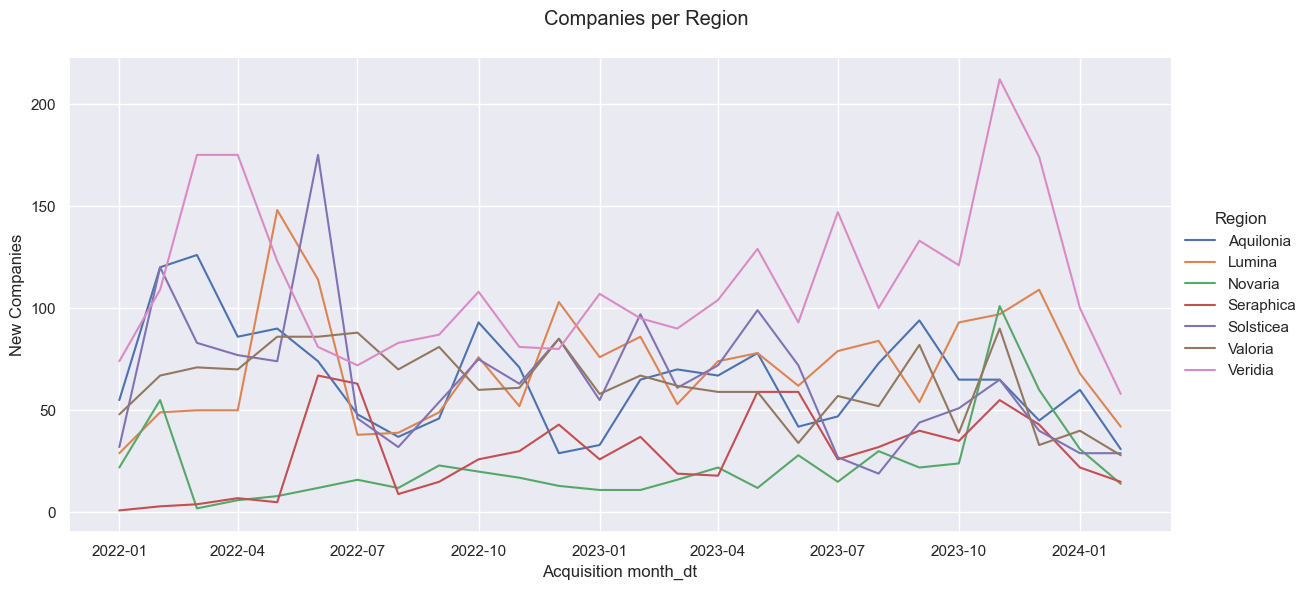

In [74]:
metric = 'Region'
tmp = acq.groupby([metric, 'Acquisition month_dt']).agg({'New Companies': 'sum'}).reset_index()
tmp.head()

facet = sns.relplot(
    data=tmp,
    x='Acquisition month_dt',
    y='New Companies',
    kind='line',
    hue=metric,
    height=6,
    aspect=2
)

facet.figure.subplots_adjust(top=.9)
facet.figure.suptitle(f'Companies per {metric}')

Text(0.5, 0.98, 'Companies per Acquisition Channel')

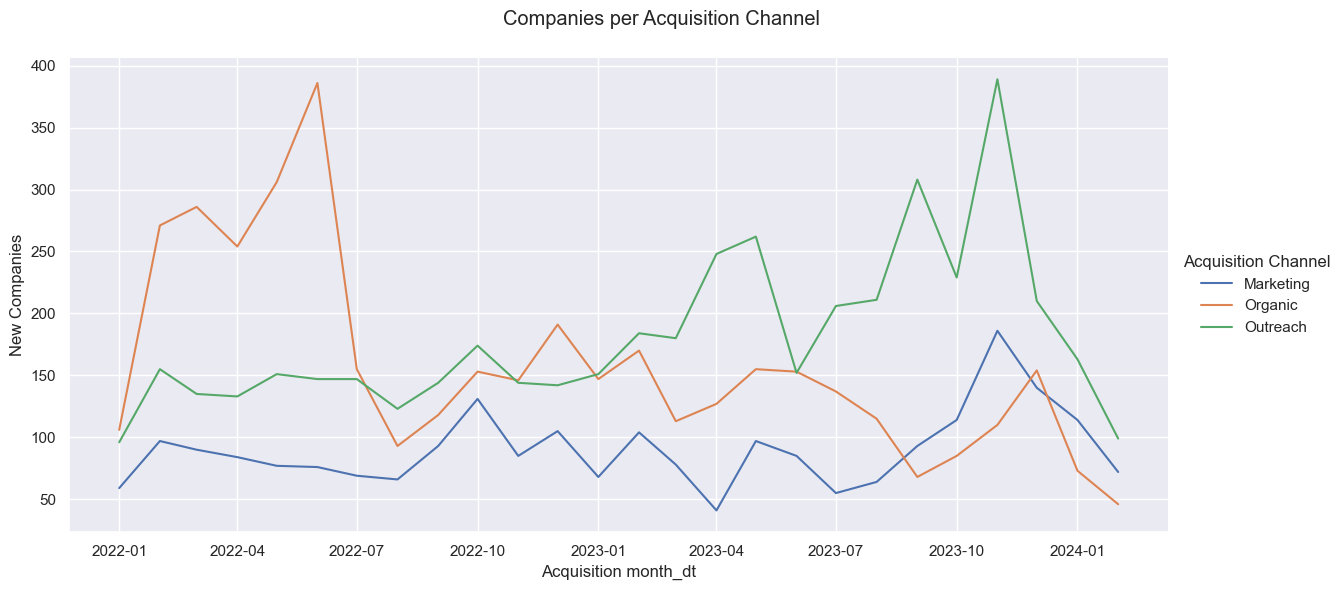

In [75]:
metric = 'Acquisition Channel'
tmp = acq.groupby([metric, 'Acquisition month_dt']).agg({'New Companies': 'sum'}).reset_index()
tmp.head()

facet = sns.relplot(
    data=tmp,
    x='Acquisition month_dt',
    y='New Companies',
    kind='line',
    hue=metric,
    height=6,
    aspect=2
)

facet.figure.subplots_adjust(top=.9)
facet.figure.suptitle(f'Companies per {metric}')

Text(0.5, 0.98, 'Companies per Tier Segment')

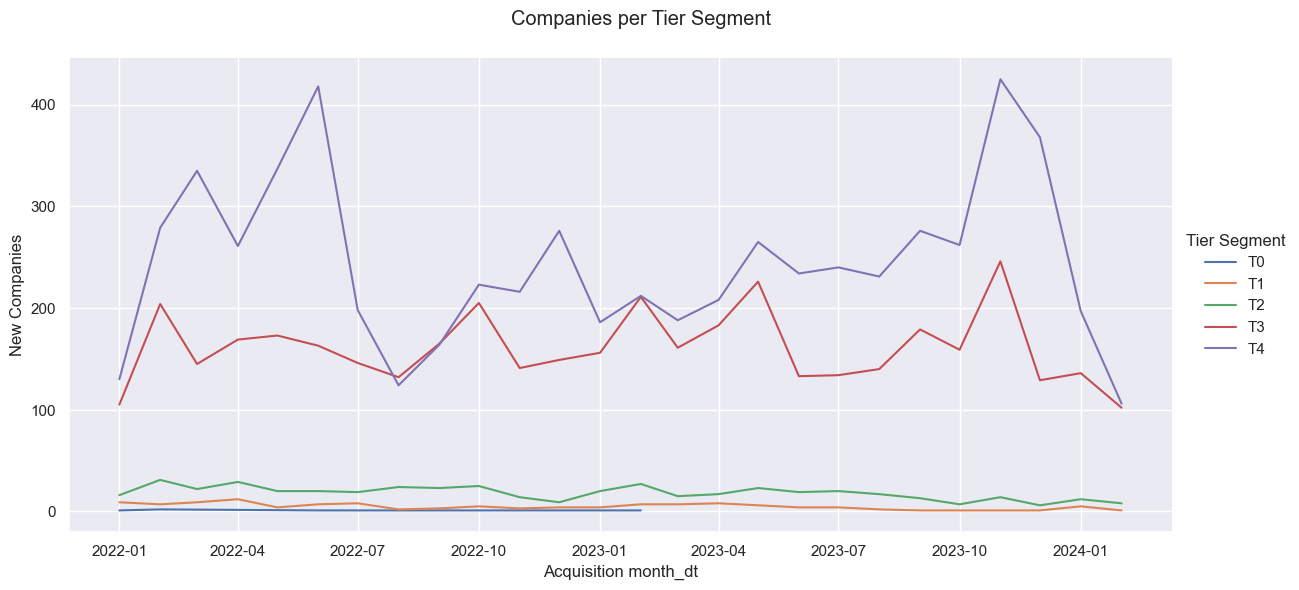

In [76]:
metric = 'Tier Segment'
tmp = acq.groupby([metric, 'Acquisition month_dt']).agg({'New Companies': 'sum'}).reset_index()
tmp.head()

facet = sns.relplot(
    data=tmp,
    x='Acquisition month_dt',
    y='New Companies',
    kind='line',
    hue=metric,
    height=6,
    aspect=2
)

facet.figure.subplots_adjust(top=.9)
facet.figure.suptitle(f'Companies per {metric}')

## Orders

In [77]:
primary_key = ['Region', 'Acquisition Channel', 'Segment', 'Order month_dt']
assert orders.set_index(primary_key).index.is_unique, 'found duplicates'

In [78]:
orders.describe()

Order month_dt  Active Companies       Revenue  \
count                           1756       1756.000000   1756.000000   
mean   2023-02-17 17:00:57.403188992         39.584282   6020.625068   
min              2022-01-01 00:00:00          1.000000      1.040000   
25%              2022-08-01 00:00:00          4.000000    761.502500   
50%              2023-03-01 00:00:00         16.000000   2682.460000   
75%              2023-09-01 00:00:00         49.250000   7707.215000   
max              2024-03-01 00:00:00        490.000000  71013.630000   
std                              NaN         62.271515   8245.028548   

             Orders  Revenue per Company  Orders per Company  Avg order cost  
count   1756.000000          1756.000000         1756.000000     1756.000000  
mean    1108.743736           556.138446          108.631116        7.661421  
min        1.000000             1.040000            1.000000        1.040000  
25%      105.000000            46.000172            4.666667        3.675632  
50%      391.000000           125.861250           19.537433        5.810916  
75%     1292.250000           431.937647           86.622685        9.846027  
max    11005.000000         18276.475000         4630.000000      189.021111  
std     1825.648834          1501.187101          321.045433        7.523696

In [79]:
orders['Region'].value_counts(dropna=False)

Region
Aquilonia    314
Novaria      290
Valoria      258
Lumina       254
Veridia      250
Seraphica    223
Solsticea    167
Name: count, dtype: int64

In [80]:
orders['Segment'].value_counts(dropna=False)

Segment
T3    515
T4    515
T2    389
T1    258
T0     79
Name: count, dtype: int64

In [81]:
orders['Acquisition Channel'].value_counts(dropna=False)

Acquisition Channel
Outreach     693
Marketing    615
Organic      448
Name: count, dtype: int64

In [82]:
tmp = orders.groupby(['Region']).agg({'Revenue': 'sum'}).reset_index()
tmp.sort_values(by='Revenue', ascending=False).head()

Region     Revenue
6    Veridia  2468345.45
5    Valoria  2068397.90
0  Aquilonia  1908885.82
1     Lumina  1434348.82
4  Solsticea   947089.52

In [83]:
tmp = orders.groupby(['Segment']).agg({'Revenue': 'sum'}).reset_index()
tmp.sort_values(by='Revenue', ascending=False).head()

Segment     Revenue
3      T3  4660793.50
2      T2  2466858.17
1      T1  1877489.65
4      T4   968027.65
0      T0   599048.65

In [84]:
tmp = orders.groupby(['Acquisition Channel']).agg({'Revenue': 'sum'}).reset_index()
tmp.sort_values(by='Revenue', ascending=False).head()

Acquisition Channel     Revenue
2            Outreach  6683881.40
0           Marketing  2332017.37
1             Organic  1556318.85

In [85]:
orders.head()

Region Acquisition Channel Segment Order month_dt  Active Companies  \
0  Novaria            Outreach      T3     2024-03-01                 1   
1   Lumina           Marketing      T2     2024-03-01                 1   
2  Veridia            Outreach      T1     2024-03-01                 4   
3  Veridia             Organic      T3     2024-03-01                 3   
4  Veridia           Marketing      T3     2024-03-01                 7   

   Revenue  Orders  Revenue per Company  Orders per Company  Avg order cost  
0     4.36       2             4.360000            2.000000        2.180000  
1     3.20       1             3.200000            1.000000        3.200000  
2   163.22      22            40.805000            5.500000        7.419091  
3    21.97       3             7.323333            1.000000        7.323333  
4    59.44       8             8.491429            1.142857        7.430000

Text(0.5, 0.98, 'Metrics per Region')

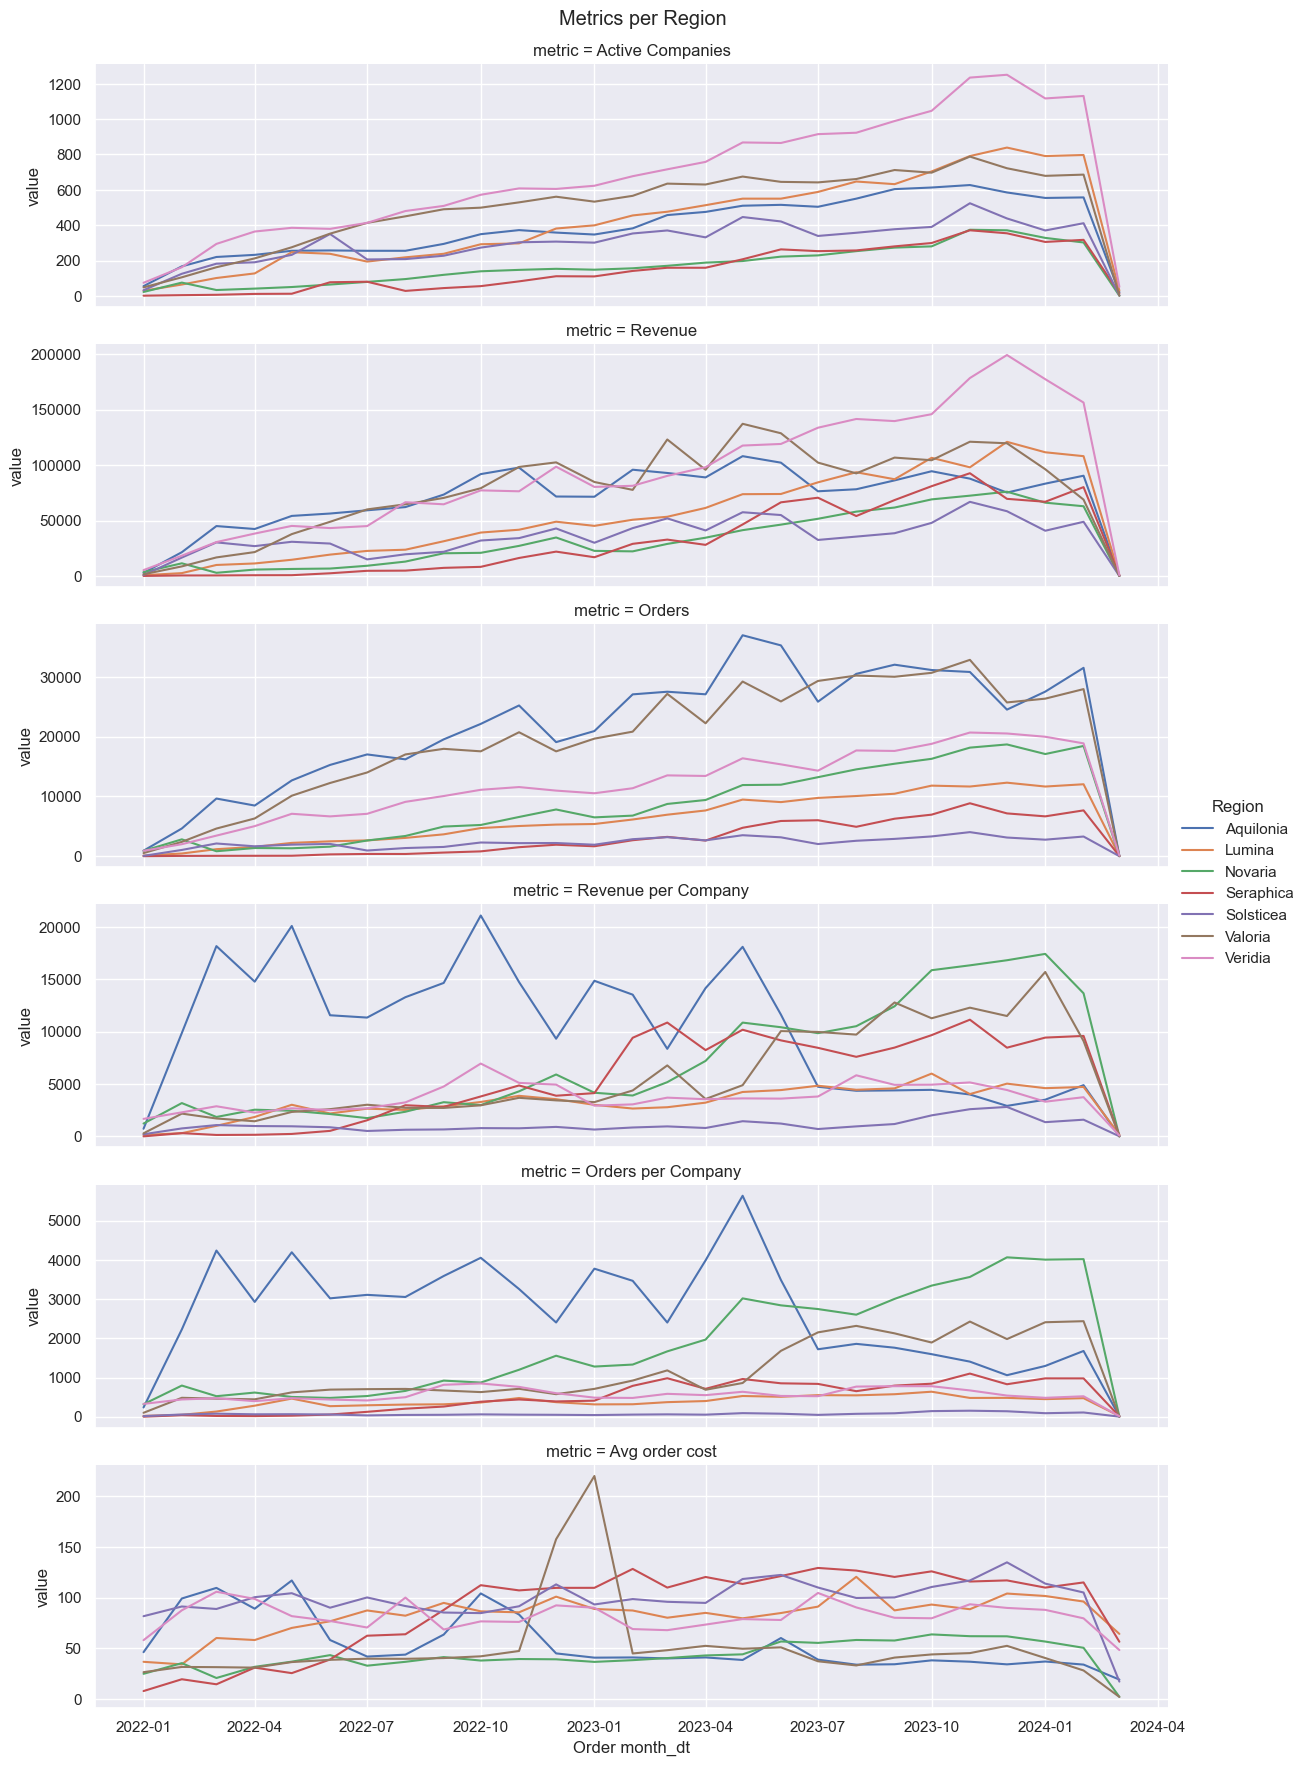

In [86]:
measure = 'Region'
metrics = ['Active Companies', 'Revenue', 'Orders', 'Revenue per Company', 'Orders per Company', 'Avg order cost']
tmp = pd.DataFrame()
for metric in metrics:
    tmp2 = orders.groupby([measure, 'Order month_dt']).agg({metric: 'sum'}).reset_index()
    tmp2 = tmp2.rename(columns={metric: 'value'})
    tmp2['metric'] = metric
    tmp = pd.concat([tmp, tmp2])

facet = sns.relplot(
    data=tmp,
    x='Order month_dt',
    y='value',
    kind='line',
    height=3,
    aspect=4,
    row='metric',
    hue=measure,
    facet_kws={'sharey': False, 'sharex': True},
)

facet.figure.subplots_adjust(top=.95)
facet.figure.suptitle(f'Metrics per {measure}')

Text(0.5, 0.98, 'Metrics per Acquisition Channel')

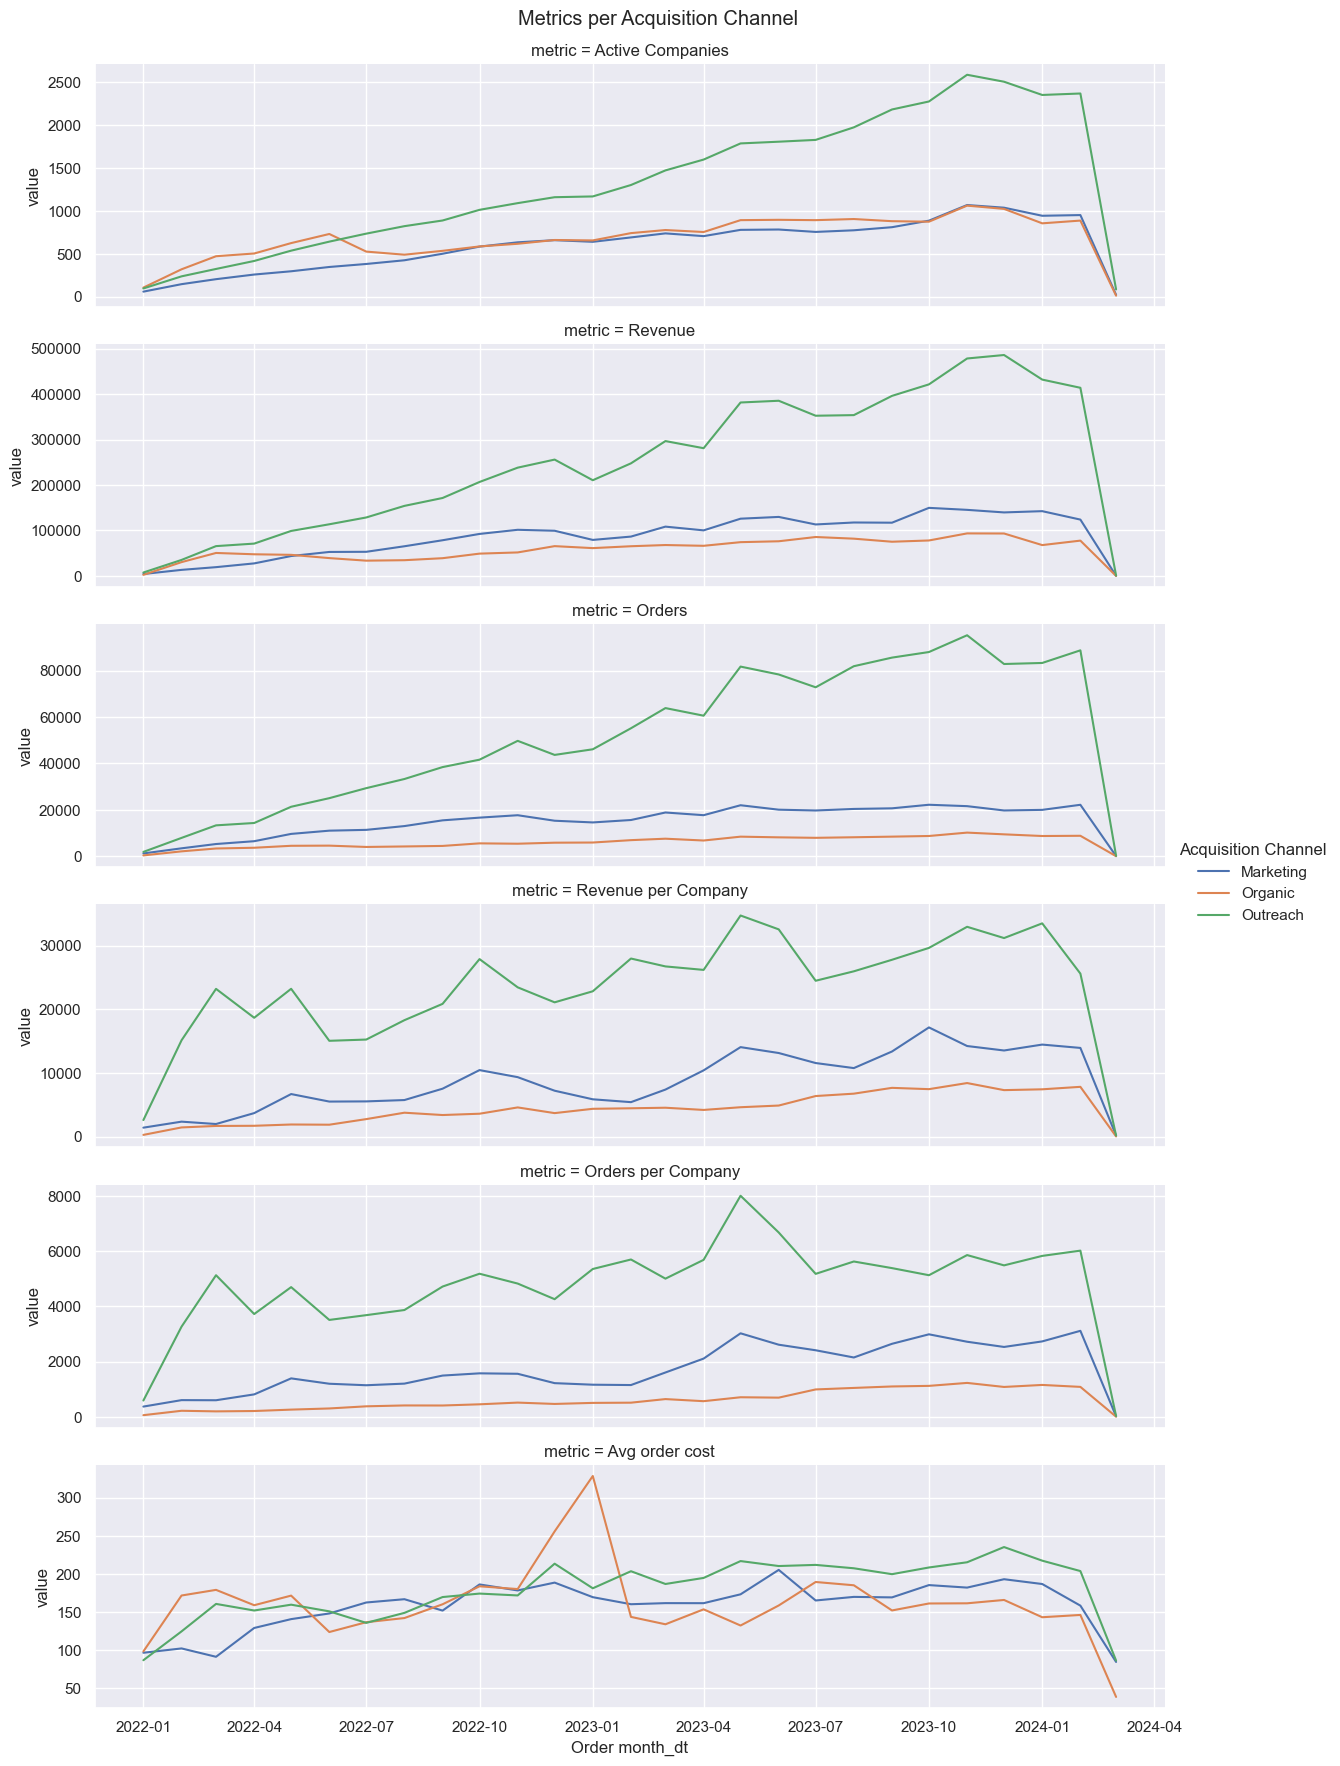

In [87]:
measure = 'Acquisition Channel'
metrics = ['Active Companies', 'Revenue', 'Orders', 'Revenue per Company', 'Orders per Company', 'Avg order cost']
tmp = pd.DataFrame()
for metric in metrics:
    tmp2 = orders.groupby([measure, 'Order month_dt']).agg({metric: 'sum'}).reset_index()
    tmp2 = tmp2.rename(columns={metric: 'value'})
    tmp2['metric'] = metric
    tmp = pd.concat([tmp, tmp2])

facet = sns.relplot(
    data=tmp,
    x='Order month_dt',
    y='value',
    kind='line',
    height=3,
    aspect=4,
    row='metric',
    hue=measure,
    facet_kws={'sharey': False, 'sharex': True},
)

facet.figure.subplots_adjust(top=.95)
facet.figure.suptitle(f'Metrics per {measure}')

Text(0.5, 0.98, 'Metrics per Segment')

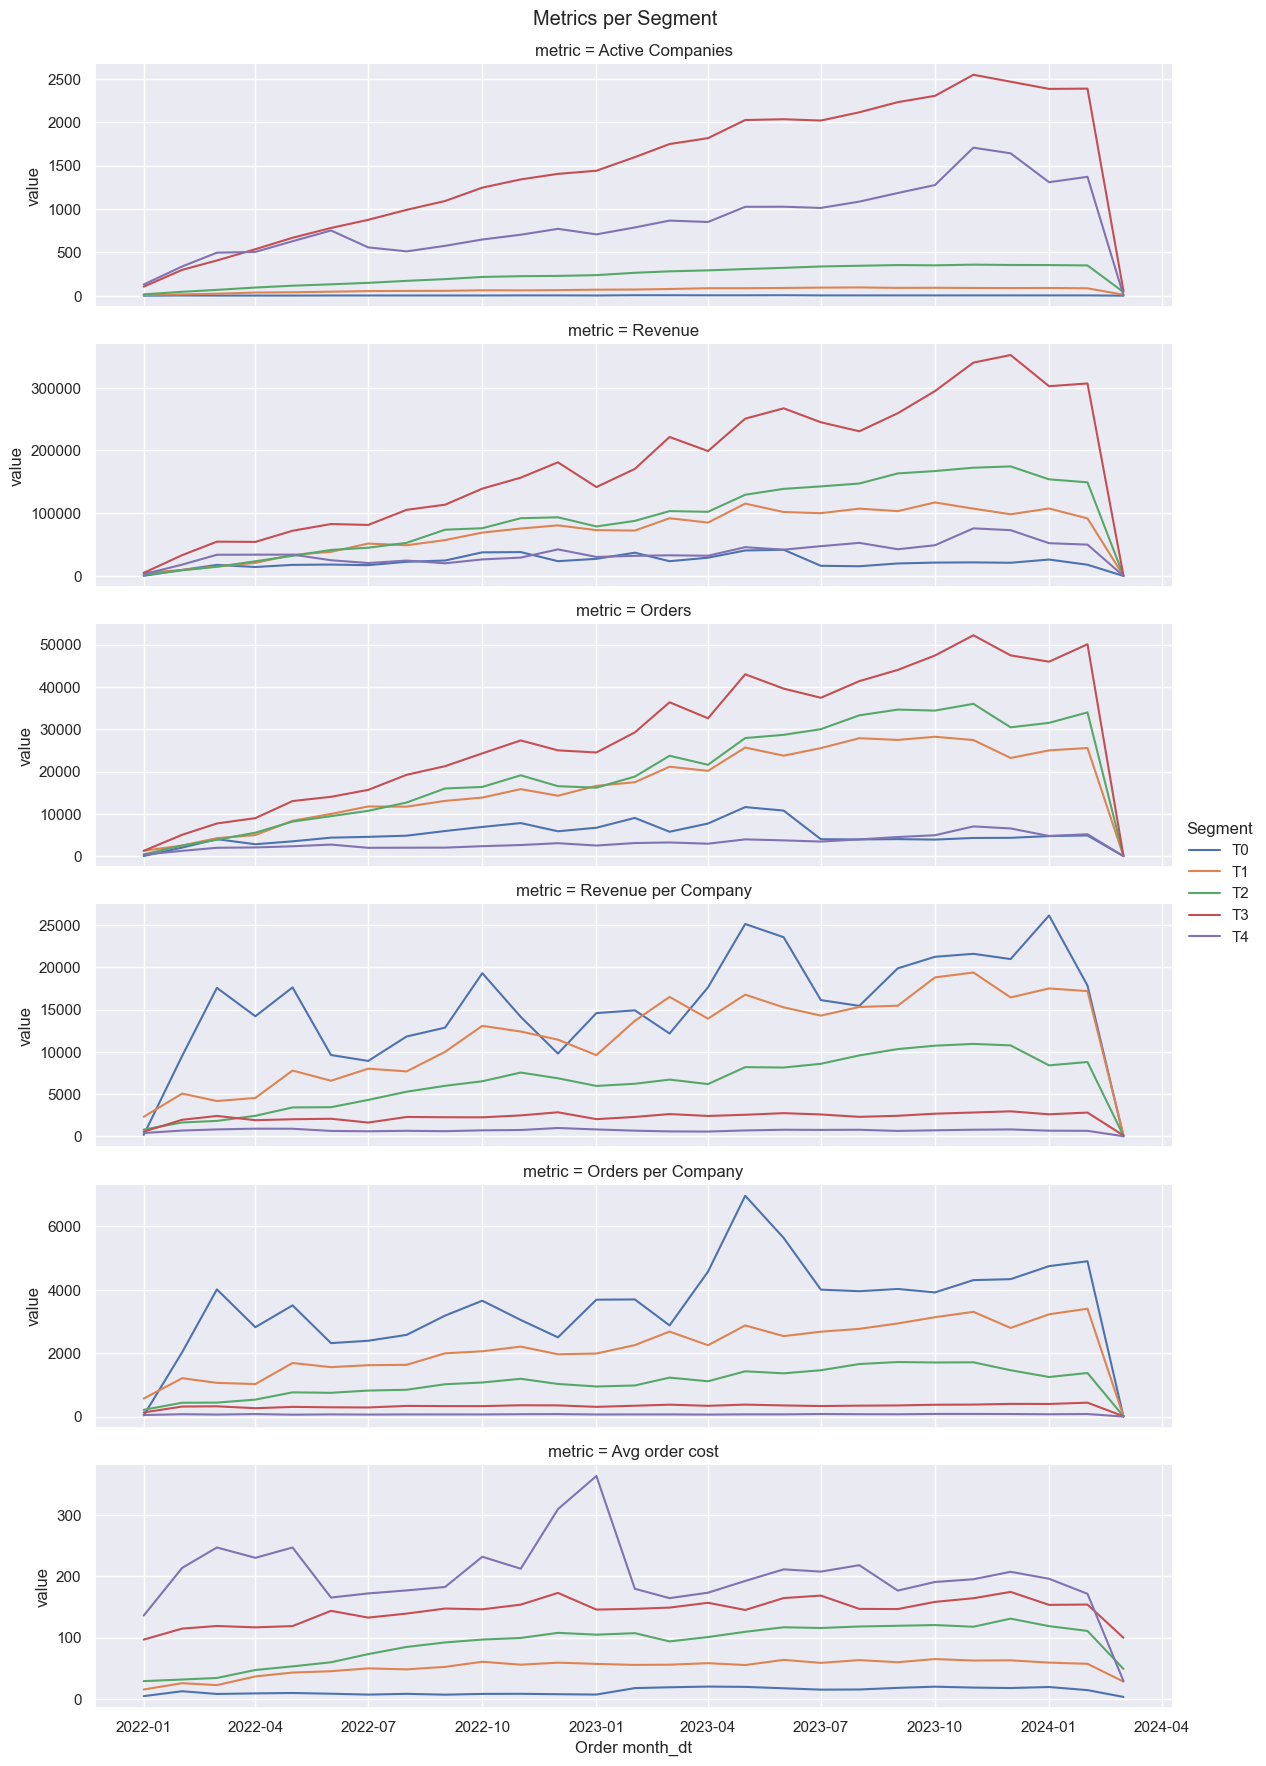

In [88]:
measure = 'Segment'
metrics = ['Active Companies', 'Revenue', 'Orders', 'Revenue per Company', 'Orders per Company', 'Avg order cost']
tmp = pd.DataFrame()
for metric in metrics:
    tmp2 = orders.groupby([measure, 'Order month_dt']).agg({metric: 'sum'}).reset_index()
    tmp2 = tmp2.rename(columns={metric: 'value'})
    tmp2['metric'] = metric
    tmp = pd.concat([tmp, tmp2])

facet = sns.relplot(
    data=tmp,
    x='Order month_dt',
    y='value',
    kind='line',
    height=3,
    aspect=4,
    row='metric',
    hue=measure,
    facet_kws={'sharey': False, 'sharex': True},
)

facet.figure.subplots_adjust(top=.95)
facet.figure.suptitle(f'Metrics per {measure}')

### Aquilonia

In [89]:
mask1 = orders['Region']=='Aquilonia'
mask2 = orders['Order month_dt'] < '2024-03'
orders2 = orders.loc[mask1&mask2]
orders2.head(2)


Region Acquisition Channel Segment Order month_dt  Active Companies  \
41  Aquilonia            Outreach      T0     2024-02-01                 1   
46  Aquilonia             Organic      T2     2024-02-01                 4   

    Revenue  Orders  Revenue per Company  Orders per Company  Avg order cost  
41  1321.91     409            1321.9100              409.00        3.232054  
46   811.39     415             202.8475              103.75        1.955157

Text(0.5, 0.98, 'Metrics per Segment')

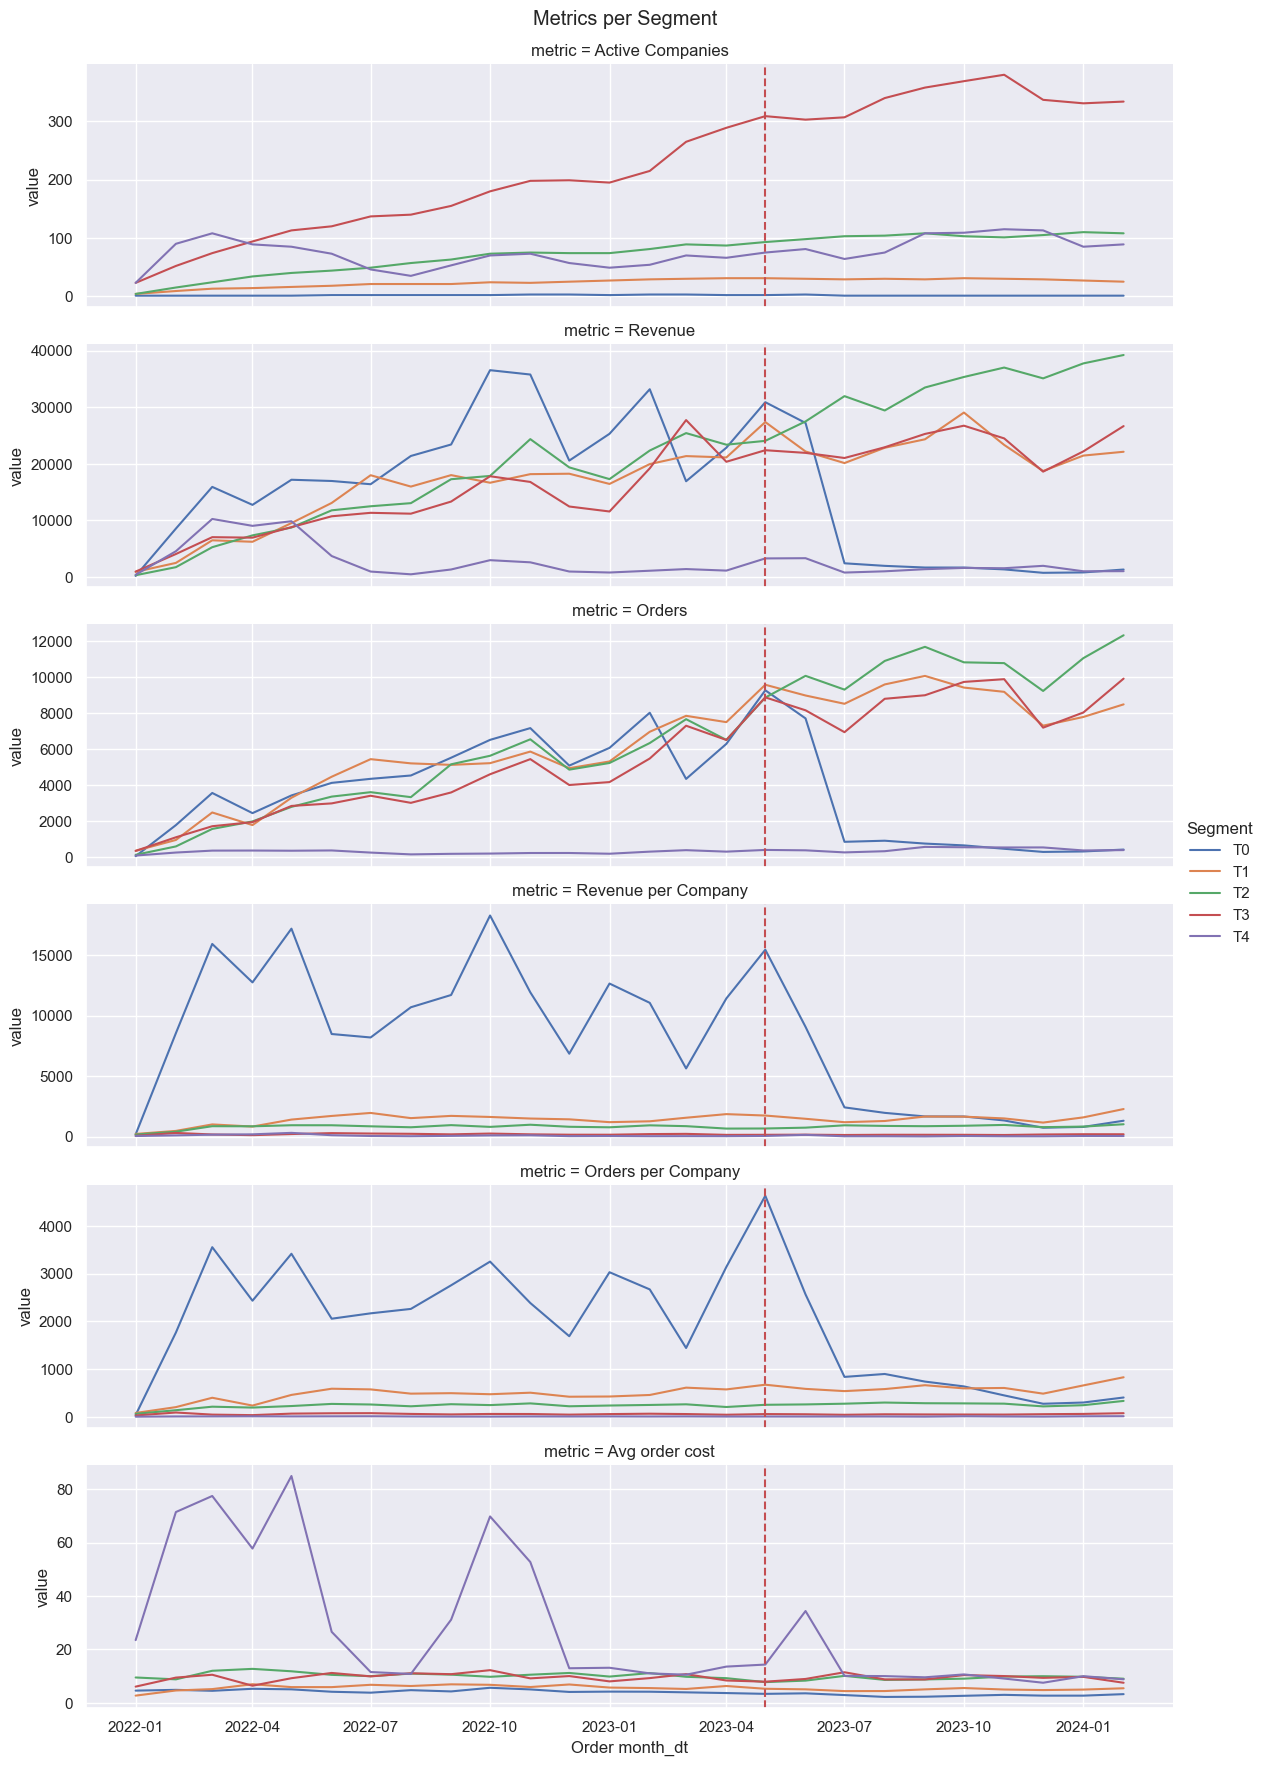

In [90]:
measure = 'Segment'
metrics = ['Active Companies', 'Revenue', 'Orders', 'Revenue per Company', 'Orders per Company', 'Avg order cost']
tmp = pd.DataFrame()
for metric in metrics:
    tmp2 = orders2.groupby([measure, 'Order month_dt']).agg({metric: 'sum'}).reset_index()
    tmp2 = tmp2.rename(columns={metric: 'value'})
    tmp2['metric'] = metric
    tmp = pd.concat([tmp, tmp2])

facet = sns.relplot(
    data=tmp,
    x='Order month_dt',
    y='value',
    kind='line',
    height=3,
    aspect=4,
    row='metric',
    hue=measure,
    facet_kws={'sharey': False, 'sharex': True},
)

for ax in facet.axes.flat:
    ax.axvline(pd.to_datetime('2023-05'), color='r', linestyle='--')

facet.figure.subplots_adjust(top=.95)
facet.figure.suptitle(f'Metrics per {measure}')

In [91]:
mask = orders['Segment']=='T0'
orders2 = orders2.loc[mask]
orders2.head(2)


Region Acquisition Channel Segment Order month_dt  Active Companies  \
41   Aquilonia            Outreach      T0     2024-02-01                 1   
116  Aquilonia            Outreach      T0     2024-01-01                 1   

     Revenue  Orders  Revenue per Company  Orders per Company  Avg order cost  
41   1321.91     409              1321.91               409.0        3.232054  
116   810.42     304               810.42               304.0        2.665855

Text(0.5, 0.98, 'Metrics per Acquisition Channel')

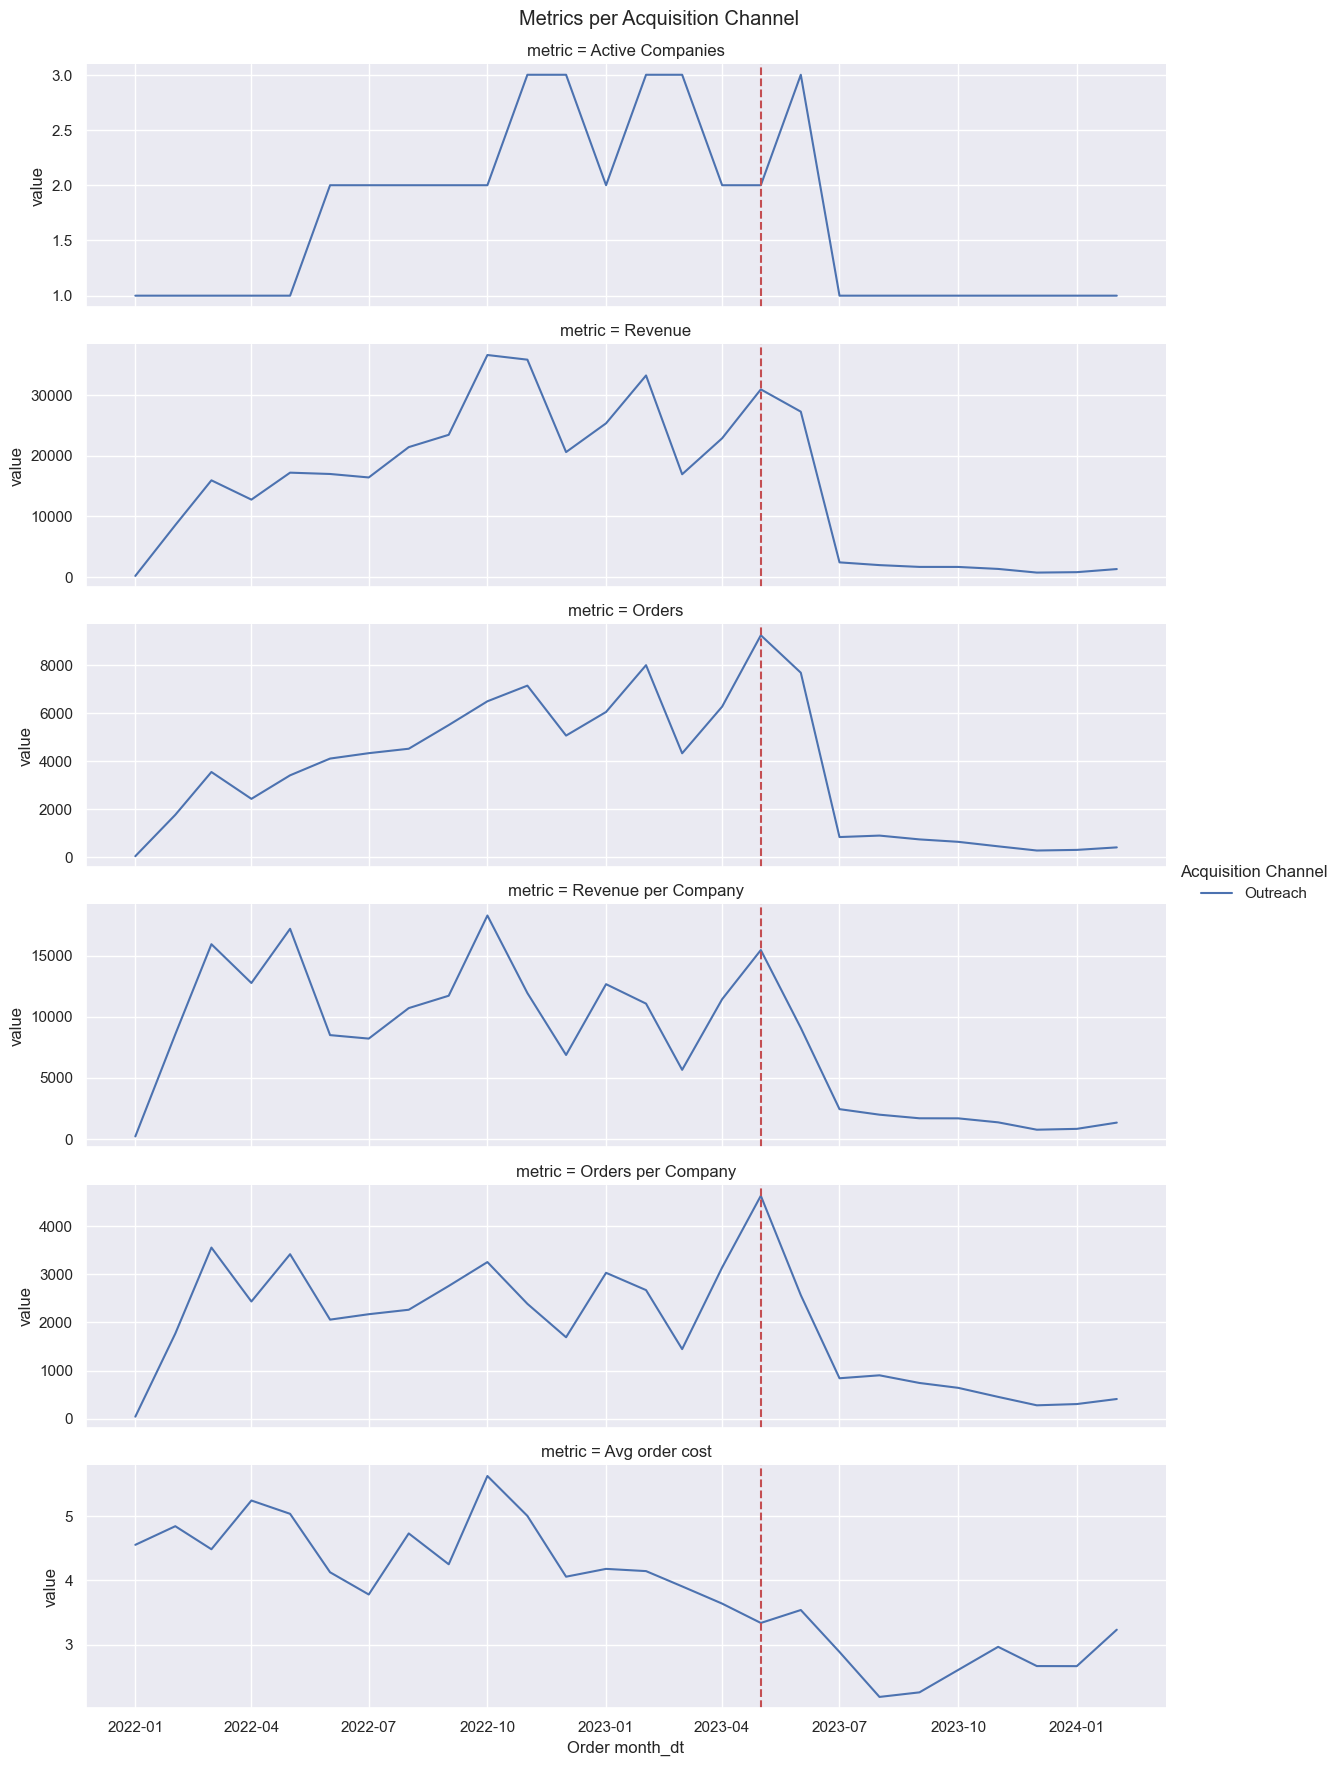

In [92]:
measure = 'Acquisition Channel'
metrics = ['Active Companies', 'Revenue', 'Orders', 'Revenue per Company', 'Orders per Company', 'Avg order cost']
tmp = pd.DataFrame()
for metric in metrics:
    tmp2 = orders2.groupby([measure, 'Order month_dt']).agg({metric: 'sum'}).reset_index()
    tmp2 = tmp2.rename(columns={metric: 'value'})
    tmp2['metric'] = metric
    tmp = pd.concat([tmp, tmp2])

facet = sns.relplot(
    data=tmp,
    x='Order month_dt',
    y='value',
    kind='line',
    height=3,
    aspect=4,
    row='metric',
    hue=measure,
    facet_kws={'sharey': False, 'sharex': True},
)

for ax in facet.axes.flat:
    ax.axvline(pd.to_datetime('2023-05'), color='r', linestyle='--')

facet.figure.subplots_adjust(top=.95)
facet.figure.suptitle(f'Metrics per {measure}')

### Valoria

In [93]:
mask1 = orders['Region']=='Valoria'
mask2 = orders['Order month_dt'] < '2024-03'
orders2 = orders.loc[mask1&mask2]
orders2.head(2)


Region Acquisition Channel Segment Order month_dt  Active Companies  \
30  Valoria            Outreach      T2     2024-02-01                87   
40  Valoria            Outreach      T0     2024-02-01                 1   

     Revenue  Orders  Revenue per Company  Orders per Company  Avg order cost  
30  16290.81    8230            187.25069           94.597701        1.979442  
40   7670.15    1781           7670.15000         1781.000000        4.306654

Text(0.5, 0.98, 'Metrics per Segment')

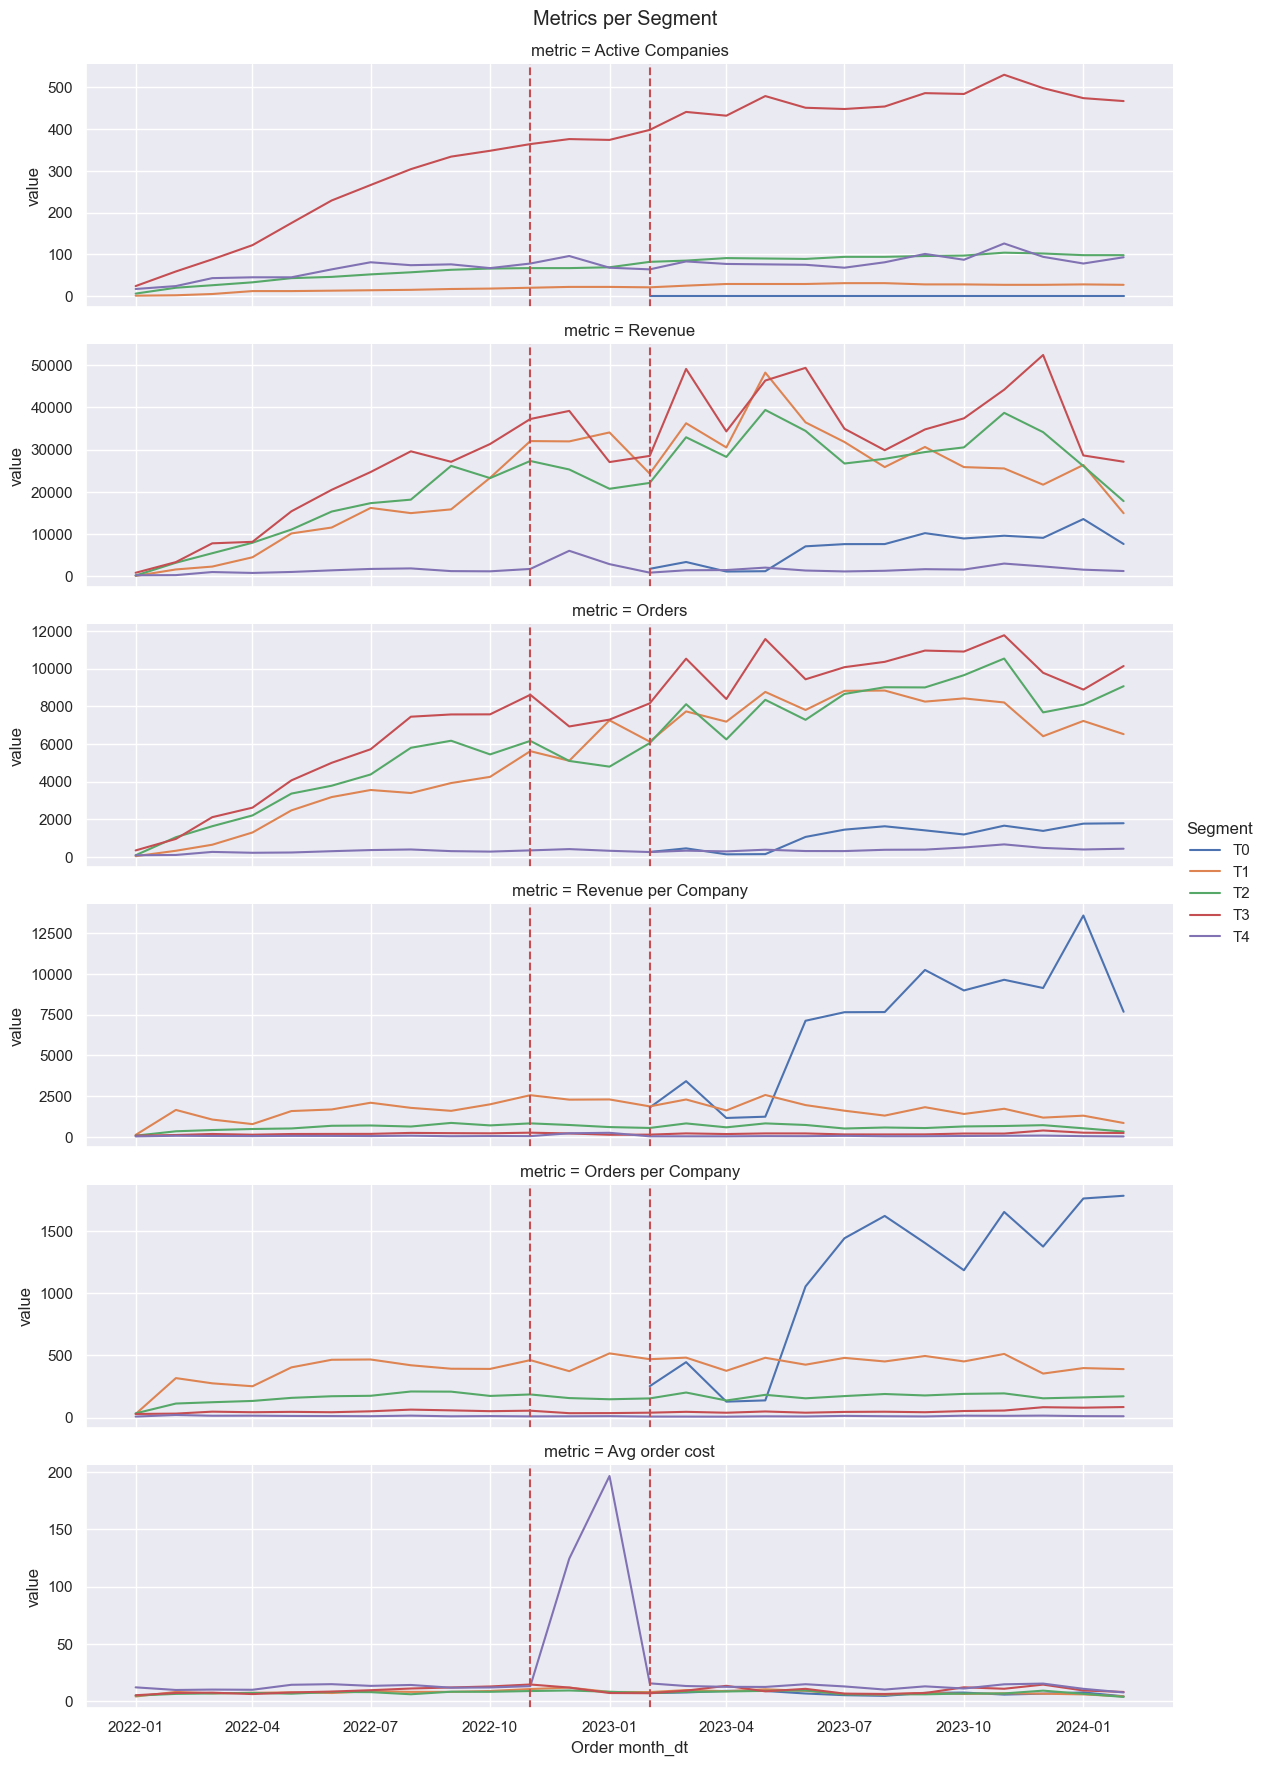

In [94]:
measure = 'Segment'
metrics = ['Active Companies', 'Revenue', 'Orders', 'Revenue per Company', 'Orders per Company', 'Avg order cost']
tmp = pd.DataFrame()
for metric in metrics:
    tmp2 = orders2.groupby([measure, 'Order month_dt']).agg({metric: 'sum'}).reset_index()
    tmp2 = tmp2.rename(columns={metric: 'value'})
    tmp2['metric'] = metric
    tmp = pd.concat([tmp, tmp2])

facet = sns.relplot(
    data=tmp,
    x='Order month_dt',
    y='value',
    kind='line',
    height=3,
    aspect=4,
    row='metric',
    hue=measure,
    facet_kws={'sharey': False, 'sharex': True},
)

for ax in facet.axes.flat:
    ax.axvline(pd.to_datetime('2022-11'), color='r', linestyle='--')
    ax.axvline(pd.to_datetime('2023-02'), color='r', linestyle='--')

facet.figure.subplots_adjust(top=.95)
facet.figure.suptitle(f'Metrics per {measure}')

In [95]:
mask = orders['Segment']=='T4'
orders2 = orders2.loc[mask]
orders2.head(2)


Region Acquisition Channel Segment Order month_dt  Active Companies  \
56  Valoria            Outreach      T4     2024-02-01                81   
73  Valoria           Marketing      T4     2024-02-01                11   

    Revenue  Orders  Revenue per Company  Orders per Company  Avg order cost  
56  1179.01     378            14.555679            4.666667        3.119074  
73    94.87      45             8.624545            4.090909        2.108222

Text(0.5, 0.98, 'Metrics per Acquisition Channel')

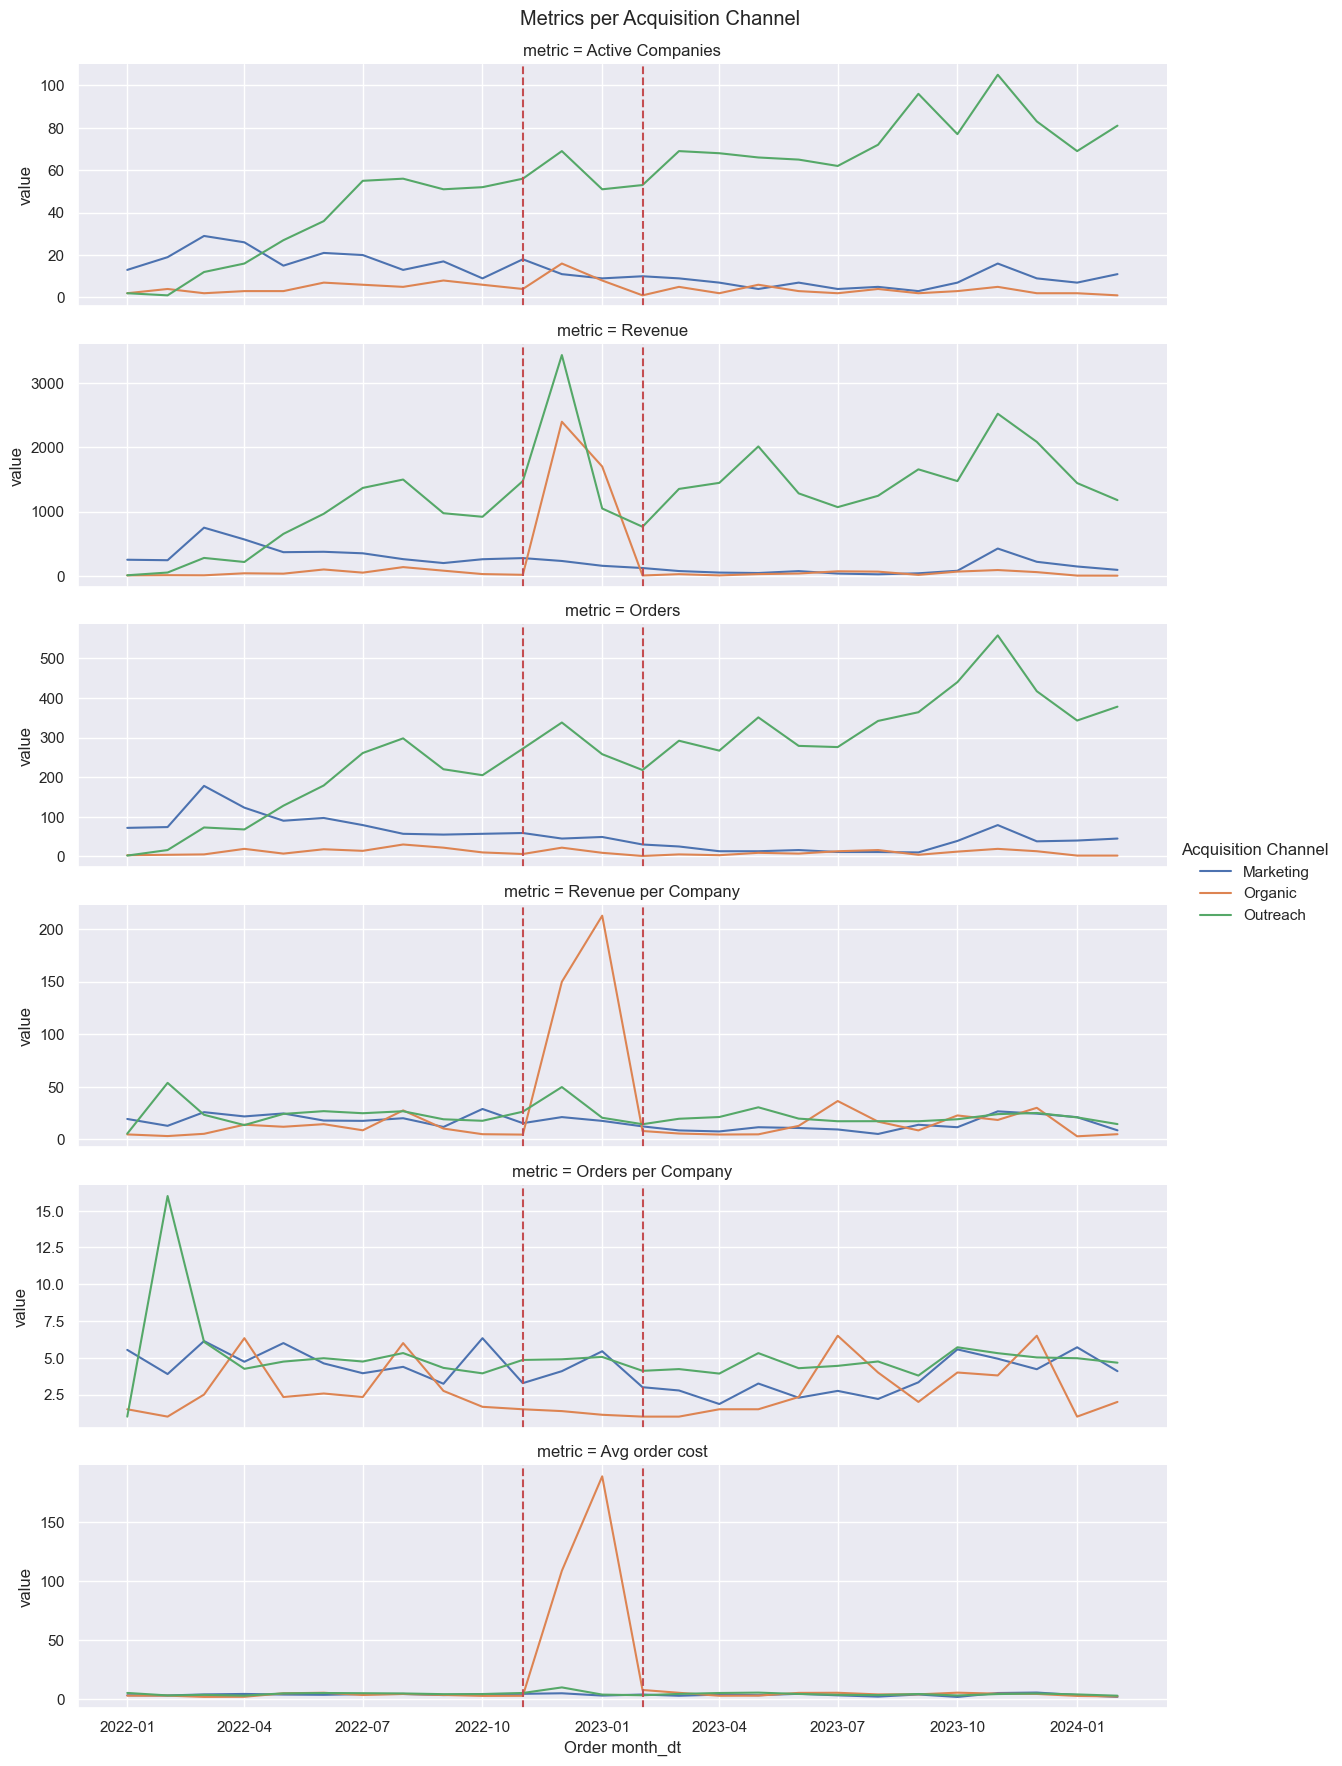

In [96]:
measure = 'Acquisition Channel'
metrics = ['Active Companies', 'Revenue', 'Orders', 'Revenue per Company', 'Orders per Company', 'Avg order cost']
tmp = pd.DataFrame()
for metric in metrics:
    tmp2 = orders2.groupby([measure, 'Order month_dt']).agg({metric: 'sum'}).reset_index()
    tmp2 = tmp2.rename(columns={metric: 'value'})
    tmp2['metric'] = metric
    tmp = pd.concat([tmp, tmp2])

facet = sns.relplot(
    data=tmp,
    x='Order month_dt',
    y='value',
    kind='line',
    height=3,
    aspect=4,
    row='metric',
    hue=measure,
    facet_kws={'sharey': False, 'sharex': True},
)

for ax in facet.axes.flat:
    ax.axvline(pd.to_datetime('2022-11'), color='r', linestyle='--')
    ax.axvline(pd.to_datetime('2023-02'), color='r', linestyle='--')

facet.figure.subplots_adjust(top=.95)
facet.figure.suptitle(f'Metrics per {measure}')

### T0 Segment end of period

In [97]:
mask1 = orders['Segment']=='T0'
mask2 = orders['Order month_dt'] < '2024-03'
orders2 = orders.loc[mask1&mask2]
orders2.head(2)

Region Acquisition Channel Segment Order month_dt  Active Companies  \
40    Valoria            Outreach      T0     2024-02-01                 1   
41  Aquilonia            Outreach      T0     2024-02-01                 1   

    Revenue  Orders  Revenue per Company  Orders per Company  Avg order cost  
40  7670.15    1781              7670.15              1781.0        4.306654  
41  1321.91     409              1321.91               409.0        3.232054

Text(0.5, 0.98, 'Metrics per Region')

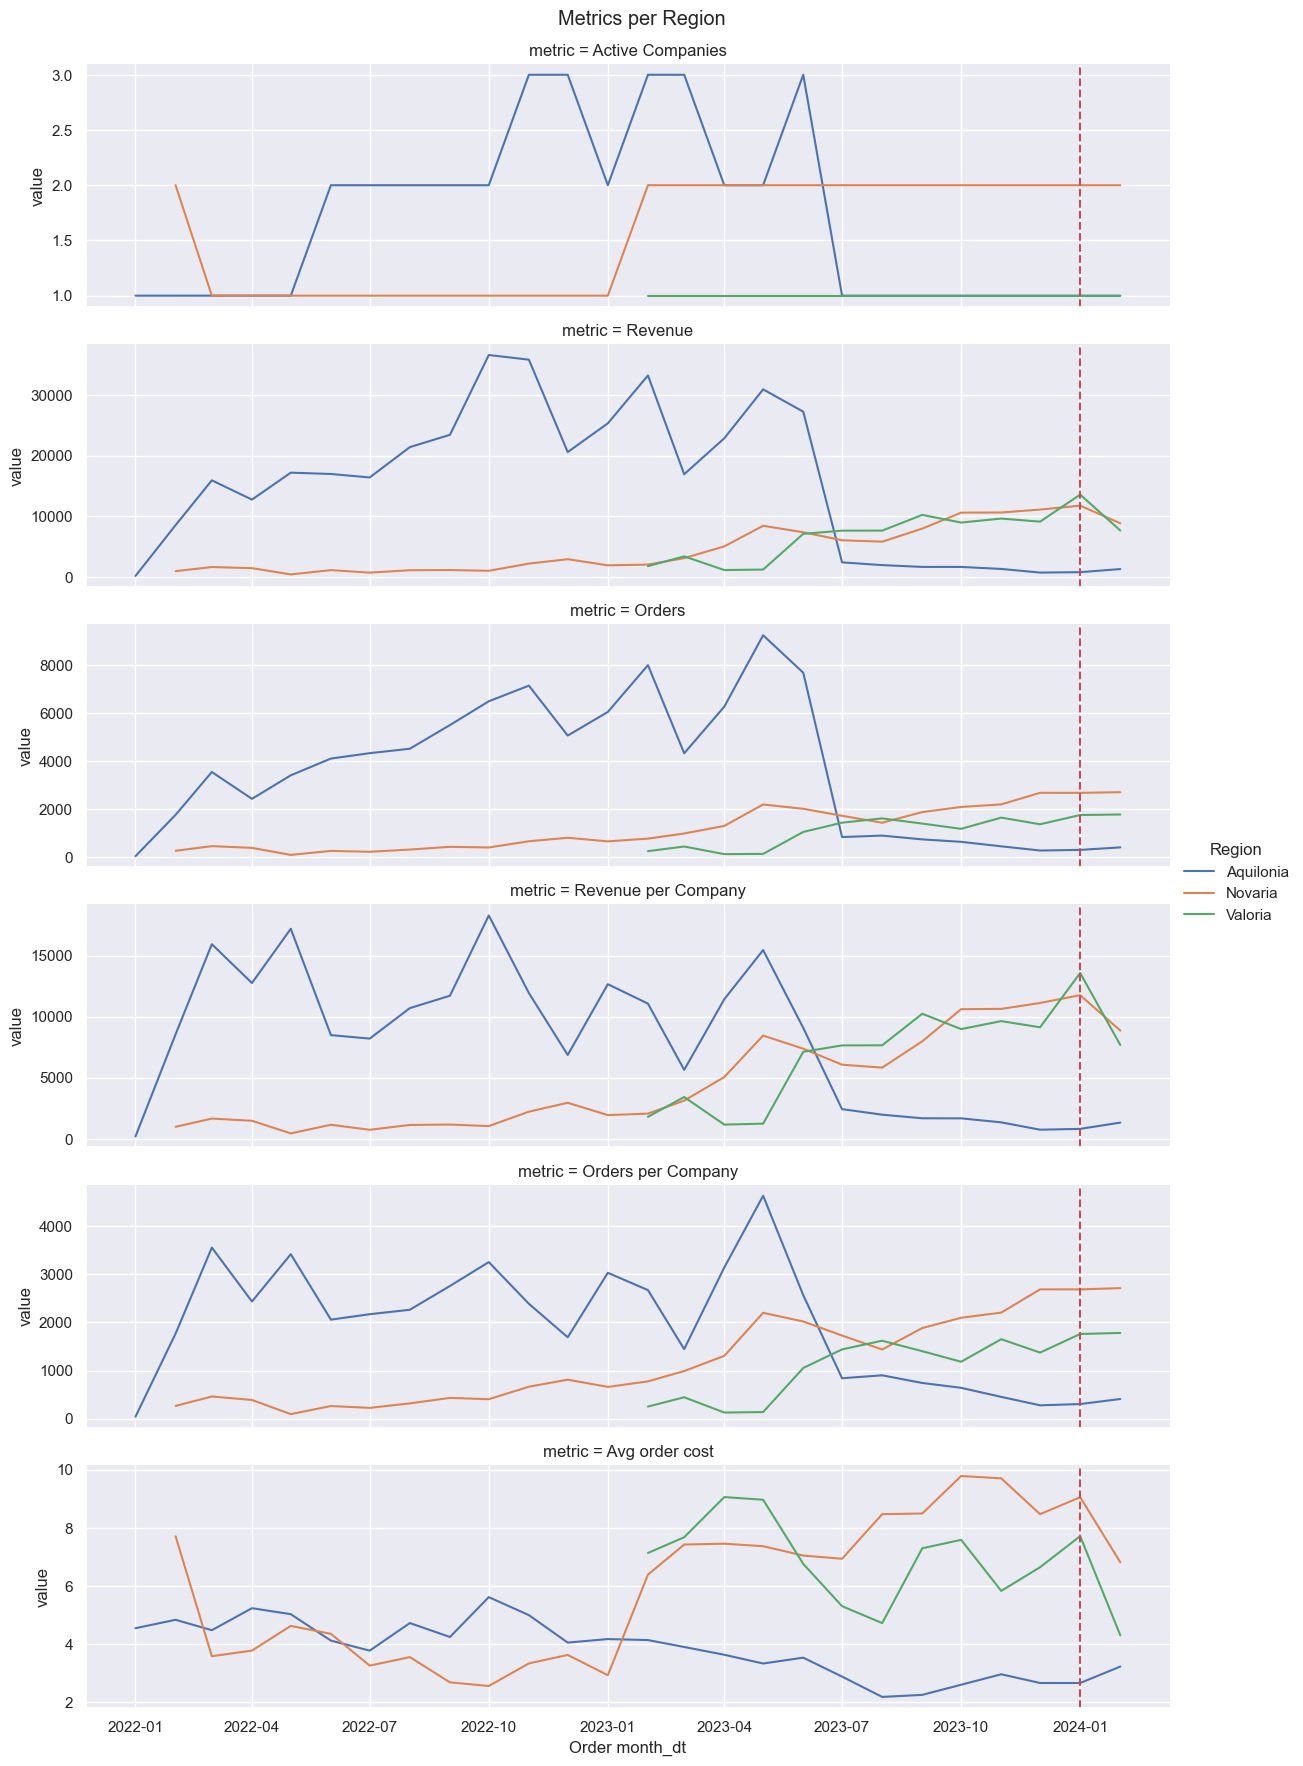

In [98]:
measure = 'Region'
metrics = ['Active Companies', 'Revenue', 'Orders', 'Revenue per Company', 'Orders per Company', 'Avg order cost']
tmp = pd.DataFrame()
for metric in metrics:
    tmp2 = orders2.groupby([measure, 'Order month_dt']).agg({metric: 'sum'}).reset_index()
    tmp2 = tmp2.rename(columns={metric: 'value'})
    tmp2['metric'] = metric
    tmp = pd.concat([tmp, tmp2])

facet = sns.relplot(
    data=tmp,
    x='Order month_dt',
    y='value',
    kind='line',
    height=3,
    aspect=4,
    row='metric',
    hue=measure,
    facet_kws={'sharey': False, 'sharex': True},
)

for ax in facet.axes.flat:
    ax.axvline(pd.to_datetime('2024-01'), color='r', linestyle='--')

facet.figure.subplots_adjust(top=.95)
facet.figure.suptitle(f'Metrics per {measure}')

### T0 Segment peaks

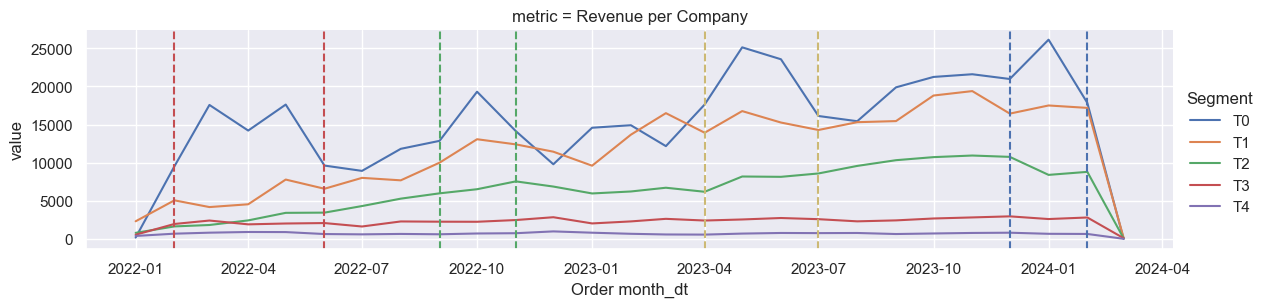

In [99]:
measure = 'Segment'
metrics = ['Revenue per Company']
tmp = pd.DataFrame()
for metric in metrics:
    tmp2 = orders.groupby([measure, 'Order month_dt']).agg({metric: 'sum'}).reset_index()
    tmp2 = tmp2.rename(columns={metric: 'value'})
    tmp2['metric'] = metric
    tmp = pd.concat([tmp, tmp2])

facet = sns.relplot(
    data=tmp,
    x='Order month_dt',
    y='value',
    kind='line',
    height=3,
    aspect=4,
    row='metric',
    hue=measure,
    facet_kws={'sharey': False, 'sharex': True},
)

for ax in facet.axes.flat:
    ax.axvline(pd.to_datetime('2022-02'), color='r', linestyle='--')
    ax.axvline(pd.to_datetime('2022-06'), color='r', linestyle='--')
    ax.axvline(pd.to_datetime('2022-09'), color='g', linestyle='--')
    ax.axvline(pd.to_datetime('2022-11'), color='g', linestyle='--')
    ax.axvline(pd.to_datetime('2023-04'), color='y', linestyle='--')
    ax.axvline(pd.to_datetime('2023-07'), color='y', linestyle='--')
    ax.axvline(pd.to_datetime('2023-12'), color='b', linestyle='--')
    ax.axvline(pd.to_datetime('2024-02'), color='b', linestyle='--')

facet.figure.subplots_adjust(top=.95)

In [100]:
mask1 = orders['Segment']=='T0'
mask2 = orders['Order month_dt'] < '2024-03'
orders2 = orders.loc[mask1&mask2]
orders2.head(2)

Region Acquisition Channel Segment Order month_dt  Active Companies  \
40    Valoria            Outreach      T0     2024-02-01                 1   
41  Aquilonia            Outreach      T0     2024-02-01                 1   

    Revenue  Orders  Revenue per Company  Orders per Company  Avg order cost  
40  7670.15    1781              7670.15              1781.0        4.306654  
41  1321.91     409              1321.91               409.0        3.232054

Text(0.5, 0.98, 'Metrics per Region')

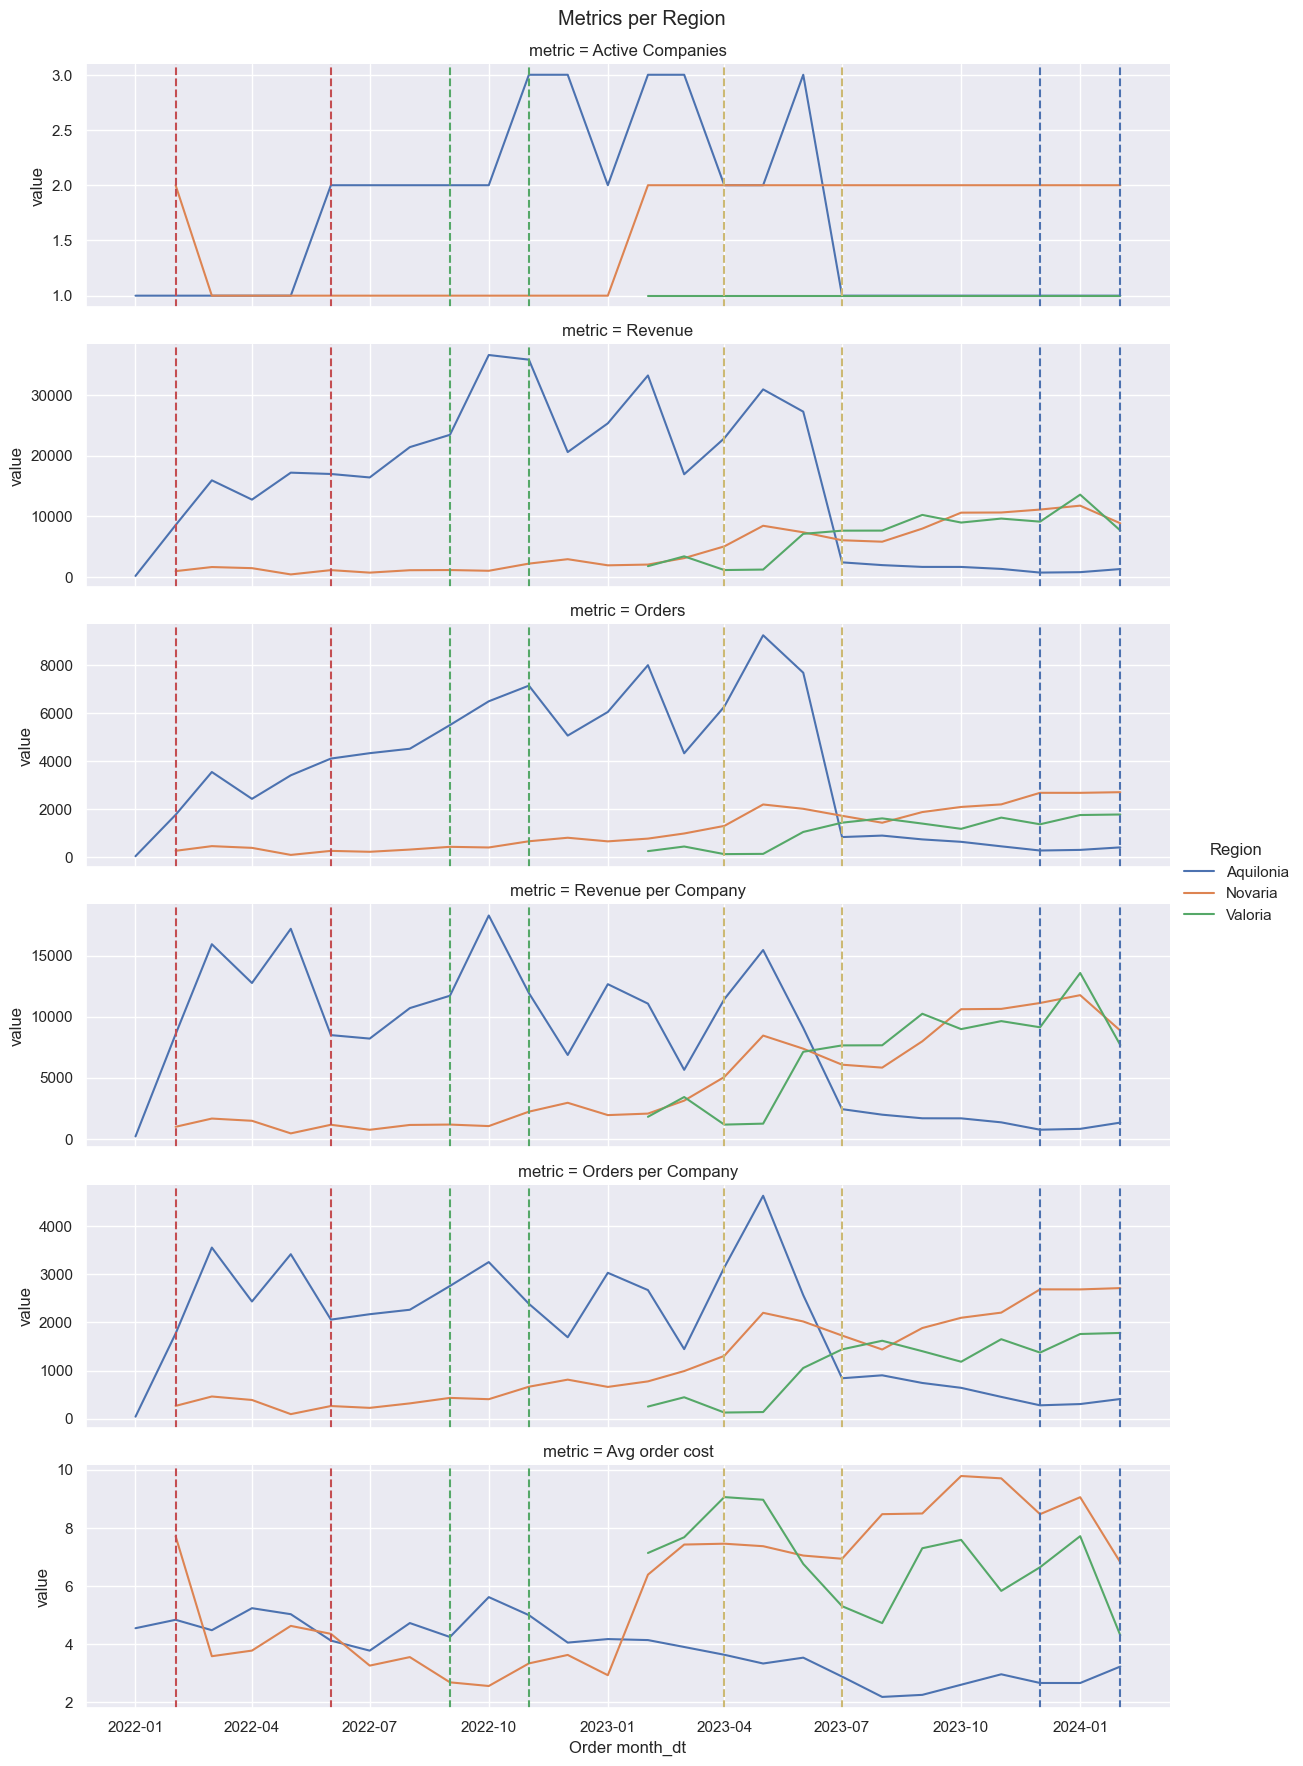

In [101]:
measure = 'Region'
metrics = ['Active Companies', 'Revenue', 'Orders', 'Revenue per Company', 'Orders per Company', 'Avg order cost']
tmp = pd.DataFrame()
for metric in metrics:
    tmp2 = orders2.groupby([measure, 'Order month_dt']).agg({metric: 'sum'}).reset_index()
    tmp2 = tmp2.rename(columns={metric: 'value'})
    tmp2['metric'] = metric
    tmp = pd.concat([tmp, tmp2])

facet = sns.relplot(
    data=tmp,
    x='Order month_dt',
    y='value',
    kind='line',
    height=3,
    aspect=4,
    row='metric',
    hue=measure,
    facet_kws={'sharey': False, 'sharex': True},
)

for ax in facet.axes.flat:
    ax.axvline(pd.to_datetime('2022-02'), color='r', linestyle='--')
    ax.axvline(pd.to_datetime('2022-06'), color='r', linestyle='--')
    ax.axvline(pd.to_datetime('2022-09'), color='g', linestyle='--')
    ax.axvline(pd.to_datetime('2022-11'), color='g', linestyle='--')
    ax.axvline(pd.to_datetime('2023-04'), color='y', linestyle='--')
    ax.axvline(pd.to_datetime('2023-07'), color='y', linestyle='--')
    ax.axvline(pd.to_datetime('2023-12'), color='b', linestyle='--')
    ax.axvline(pd.to_datetime('2024-02'), color='b', linestyle='--')

facet.figure.subplots_adjust(top=.95)
facet.figure.suptitle(f'Metrics per {measure}')

### T4 Segment peaks

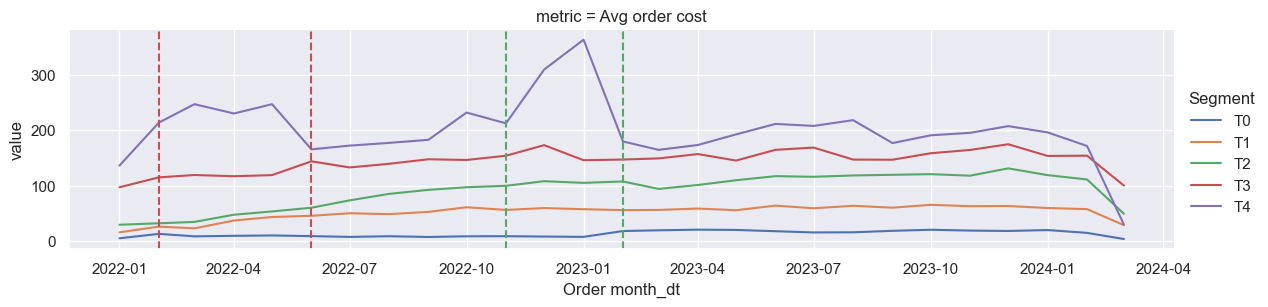

In [102]:
measure = 'Segment'
metrics = ['Avg order cost']
tmp = pd.DataFrame()
for metric in metrics:
    tmp2 = orders.groupby([measure, 'Order month_dt']).agg({metric: 'sum'}).reset_index()
    tmp2 = tmp2.rename(columns={metric: 'value'})
    tmp2['metric'] = metric
    tmp = pd.concat([tmp, tmp2])

facet = sns.relplot(
    data=tmp,
    x='Order month_dt',
    y='value',
    kind='line',
    height=3,
    aspect=4,
    row='metric',
    hue=measure,
    facet_kws={'sharey': False, 'sharex': True},
)

for ax in facet.axes.flat:
    ax.axvline(pd.to_datetime('2022-02'), color='r', linestyle='--')
    ax.axvline(pd.to_datetime('2022-06'), color='r', linestyle='--')
    ax.axvline(pd.to_datetime('2022-11'), color='g', linestyle='--')
    ax.axvline(pd.to_datetime('2023-02'), color='g', linestyle='--')

facet.figure.subplots_adjust(top=.95)

In [103]:
mask1 = orders['Segment']=='T4'
mask2 = orders['Order month_dt'] < '2024-03'
orders2 = orders.loc[mask1&mask2]
orders2.head(2)

Region Acquisition Channel Segment Order month_dt  Active Companies  \
32  Novaria             Organic      T4     2024-02-01                 9   
33  Novaria           Marketing      T4     2024-02-01                 7   

    Revenue  Orders  Revenue per Company  Orders per Company  Avg order cost  
32   238.79      42            26.532222            4.666667        5.685476  
33    43.00      12             6.142857            1.714286        3.583333

Text(0.5, 0.98, 'Metrics per Region')

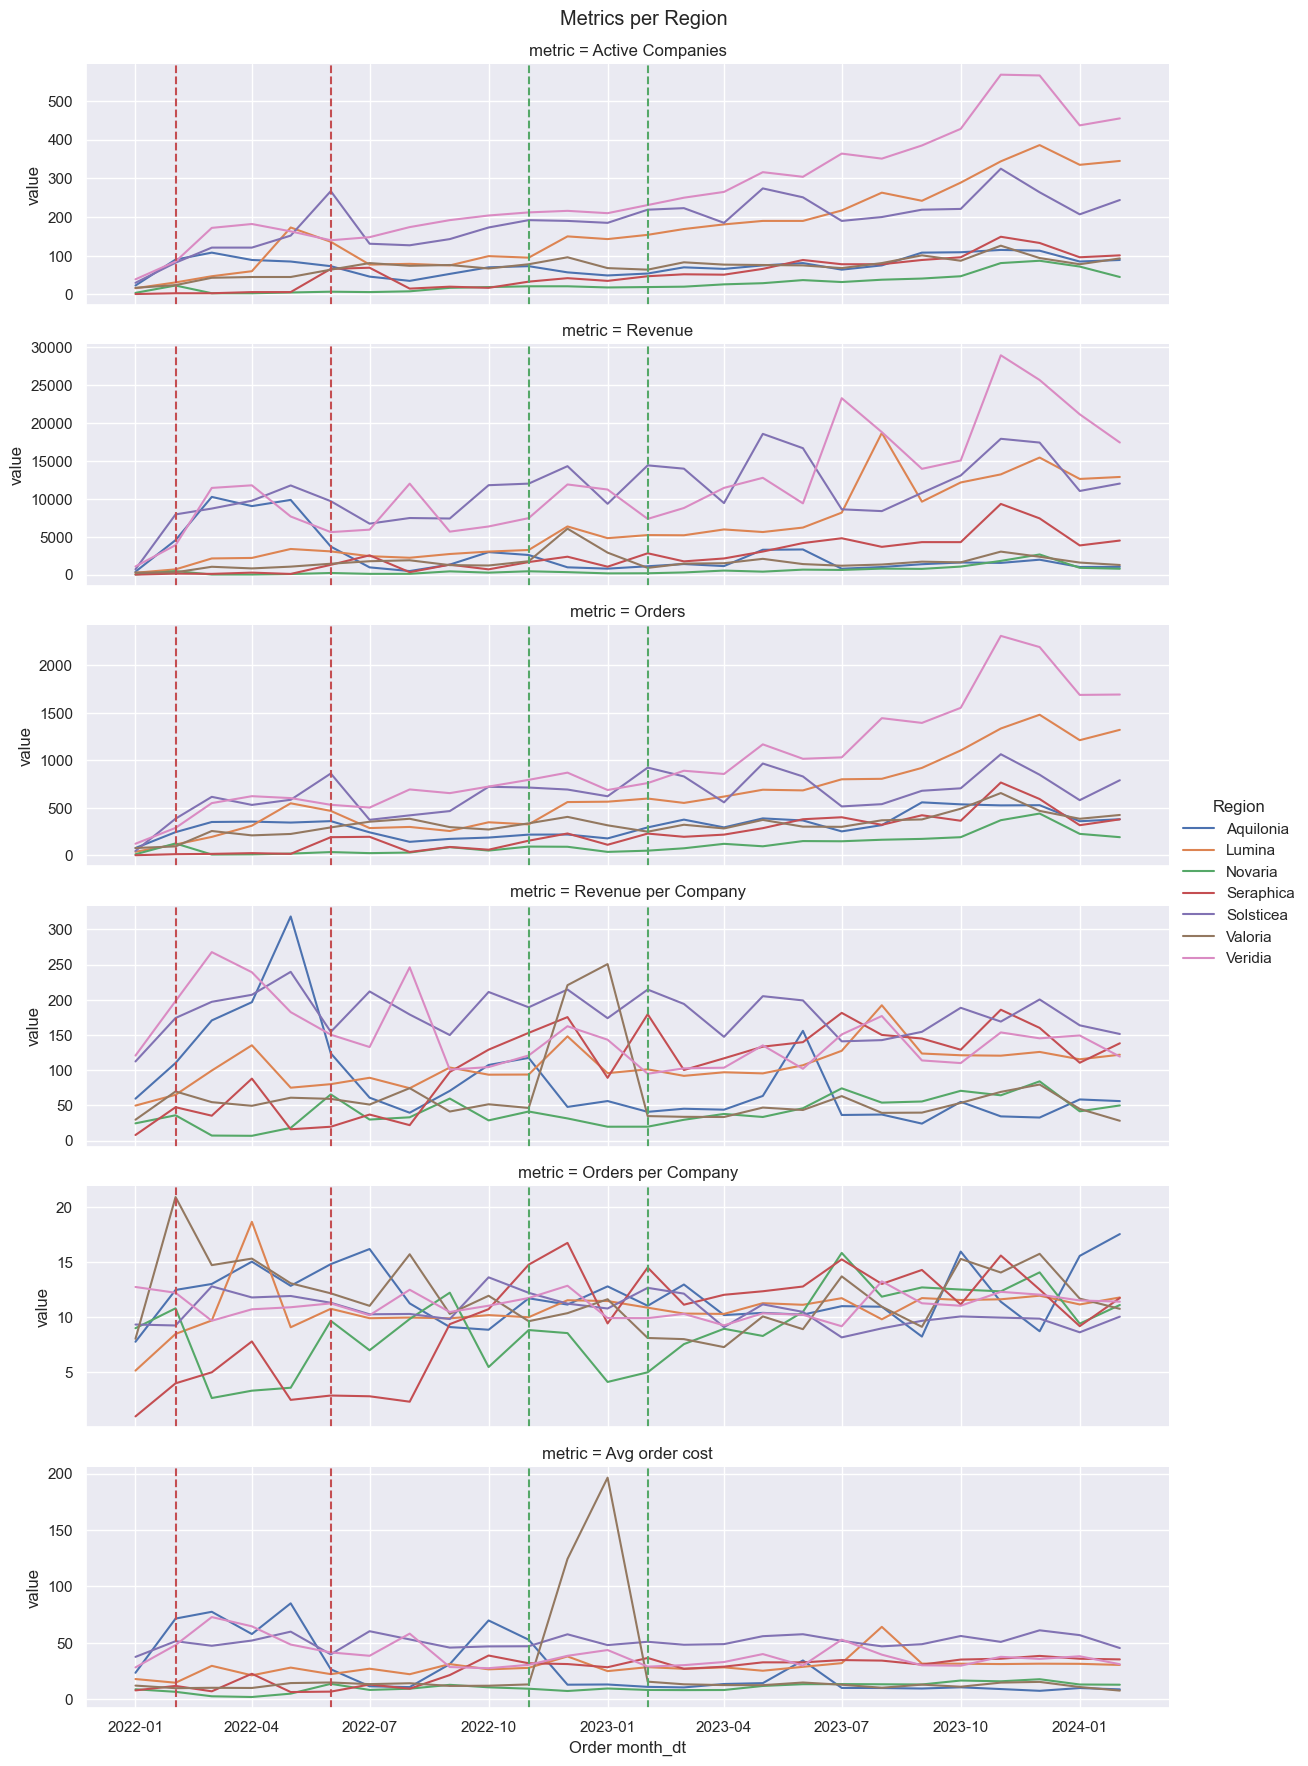

In [104]:
measure = 'Region'
metrics = ['Active Companies', 'Revenue', 'Orders', 'Revenue per Company', 'Orders per Company', 'Avg order cost']
tmp = pd.DataFrame()
for metric in metrics:
    tmp2 = orders2.groupby([measure, 'Order month_dt']).agg({metric: 'sum'}).reset_index()
    tmp2 = tmp2.rename(columns={metric: 'value'})
    tmp2['metric'] = metric
    tmp = pd.concat([tmp, tmp2])

facet = sns.relplot(
    data=tmp,
    x='Order month_dt',
    y='value',
    kind='line',
    height=3,
    aspect=4,
    row='metric',
    hue=measure,
    facet_kws={'sharey': False, 'sharex': True},
)

for ax in facet.axes.flat:
    ax.axvline(pd.to_datetime('2022-02'), color='r', linestyle='--')
    ax.axvline(pd.to_datetime('2022-06'), color='r', linestyle='--')
    ax.axvline(pd.to_datetime('2022-11'), color='g', linestyle='--')
    ax.axvline(pd.to_datetime('2023-02'), color='g', linestyle='--')

facet.figure.subplots_adjust(top=.95)
facet.figure.suptitle(f'Metrics per {measure}')

### Novaria

In [105]:
mask1 = orders['Region']=='Novaria'
mask2 = orders['Order month_dt'] < '2024-03'
orders2 = orders.loc[mask1&mask2]
orders2.head(2)


Region Acquisition Channel Segment Order month_dt  Active Companies  \
31  Novaria            Outreach      T3     2024-02-01               128   
32  Novaria             Organic      T4     2024-02-01                 9   

     Revenue  Orders  Revenue per Company  Orders per Company  Avg order cost  
31  15333.65    3992           119.794141           31.187500        3.841095  
32    238.79      42            26.532222            4.666667        5.685476

Text(0.5, 0.98, 'Metrics per Segment')

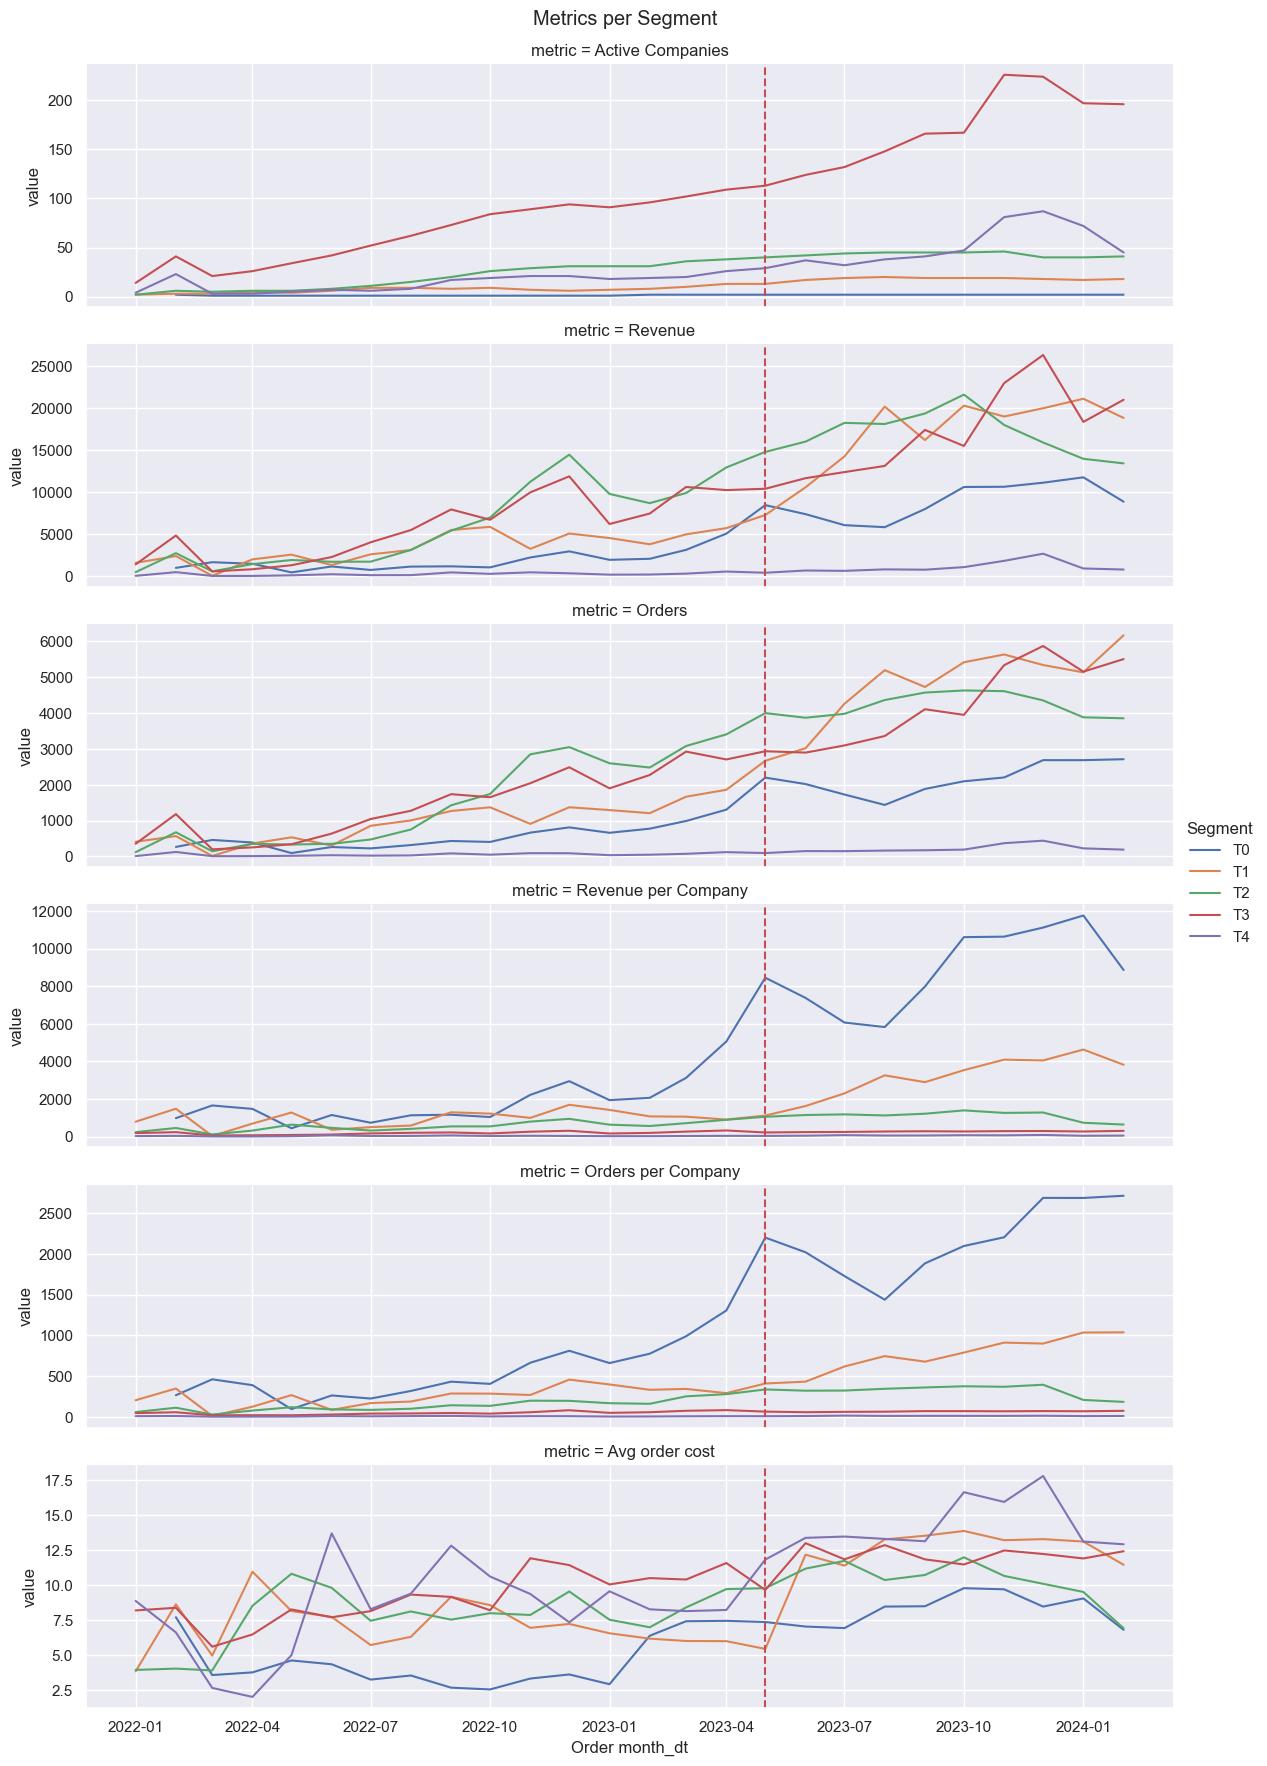

In [106]:
measure = 'Segment'
metrics = ['Active Companies', 'Revenue', 'Orders', 'Revenue per Company', 'Orders per Company', 'Avg order cost']
tmp = pd.DataFrame()
for metric in metrics:
    tmp2 = orders2.groupby([measure, 'Order month_dt']).agg({metric: 'sum'}).reset_index()
    tmp2 = tmp2.rename(columns={metric: 'value'})
    tmp2['metric'] = metric
    tmp = pd.concat([tmp, tmp2])

facet = sns.relplot(
    data=tmp,
    x='Order month_dt',
    y='value',
    kind='line',
    height=3,
    aspect=4,
    row='metric',
    hue=measure,
    facet_kws={'sharey': False, 'sharex': True},
)

for ax in facet.axes.flat:
    ax.axvline(pd.to_datetime('2023-05'), color='r', linestyle='--')

facet.figure.subplots_adjust(top=.95)
facet.figure.suptitle(f'Metrics per {measure}')

## Acquisitions + Active companies

In [126]:
# соединяем таблицы
df = pd.merge(
    orders, 
    acq,
    left_on=['Region', 'Acquisition Channel','Segment','Order month_dt'],
    right_on=['Region', 'Acquisition Channel','Tier Segment','Acquisition month_dt'],
    how='outer'
    )
df['New Companies'] = df['New Companies'].fillna(0)
del df['Tier Segment'], df['Acquisition month_dt'], df['Revenue']
del df['Orders'], df['Revenue per Company'], df['Orders per Company'], df['Avg order cost']
display(df.head(2))
display(df.info())



Region Acquisition Channel Segment Order month_dt  Active Companies  \
0  Novaria            Outreach      T3     2024-03-01                 1   
1   Lumina           Marketing      T2     2024-03-01                 1   

   New Companies  
0            0.0  
1            0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1756 entries, 0 to 1755
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Region               1756 non-null   object        
 1   Acquisition Channel  1756 non-null   object        
 2   Segment              1756 non-null   object        
 3   Order month_dt       1756 non-null   datetime64[ns]
 4   Active Companies     1756 non-null   int64         
 5   New Companies        1756 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 82.4+ KB


None

In [127]:
mask1 = df['Order month_dt'] < '2024-03'
mask2 = df['Region'] == 'Aquilonia'
df2 = df.loc[mask1&mask2]

df2 = df2.groupby(['Region','Order month_dt'], as_index=False).agg({'Active Companies': 'sum', 'New Companies': 'sum'})
df2['New Companies'] = df2['New Companies'].cumsum()
df2['Share of active companies'] = df2['Active Companies']/df2['New Companies']*100.00
df2.head(2)

Region Order month_dt  Active Companies  New Companies  \
0  Aquilonia     2022-01-01                55           55.0   
1  Aquilonia     2022-02-01               167          175.0   

   Share of active companies  
0                 100.000000  
1                  95.428571

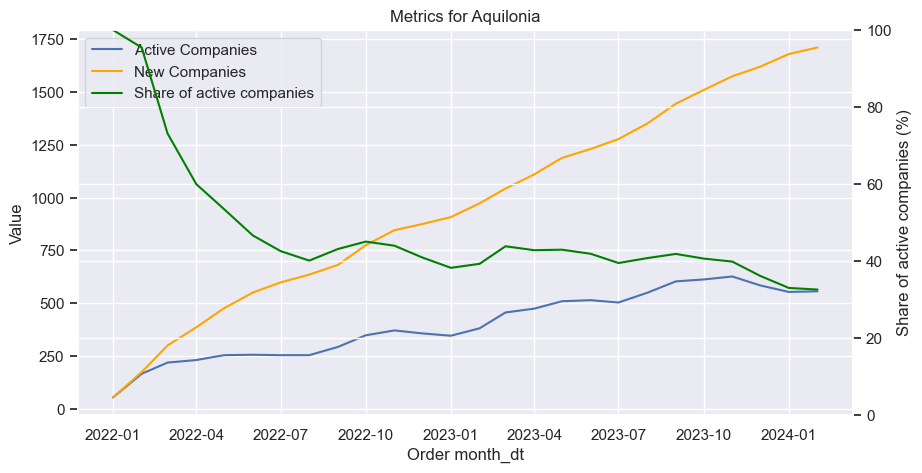

In [128]:
measure = 'Region'
metrics = ['Active Companies', 'New Companies','Share of active companies']
    
for region in df2[measure].unique():
    df_region = df2[df2[measure] == region]

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(data=df_region, x='Order month_dt', y='Active Companies', label='Active Companies', ax=ax)

    ax.plot(df_region['Order month_dt'], df_region['New Companies'], label='New Companies', color='orange')
    
    # Создание второй оси y
    ax2 = ax.twinx()
    ax2.plot(df_region['Order month_dt'], df_region['Share of active companies'], label='Share of active companies', color='green')
    
    # Конвертирование значений в проценты
    ax2.set_ylim(0, 100)
    ax2.set_ylabel('Share of active companies (%)')
    
    ax.set_title(f'Metrics for {region}')
    ax.set_ylabel('Value')
    ax.set_xlabel('Order month_dt')
    
    # Объединение легенд для обеих осей
    lines_1, labels_1 = ax.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

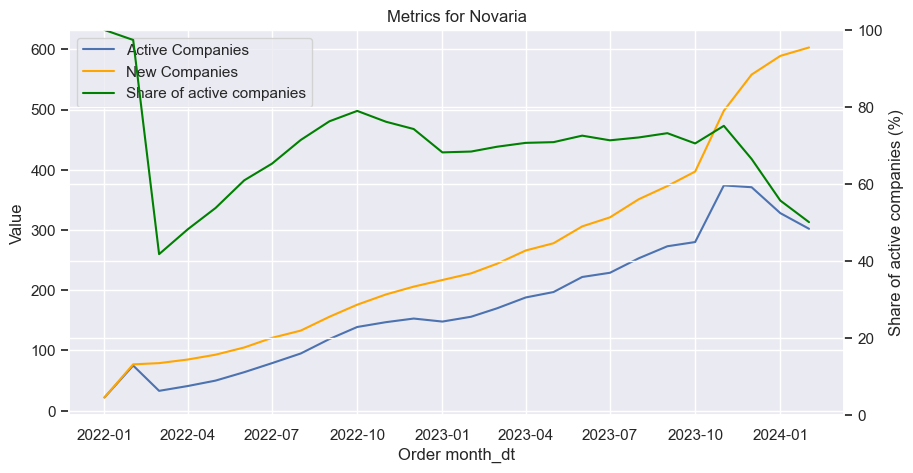

In [131]:
mask1 = df['Order month_dt'] < '2024-03'
mask2 = df['Region'] == 'Novaria'
df2 = df.loc[mask1&mask2]

df2 = df2.groupby(['Region','Order month_dt'], as_index=False).agg({'Active Companies': 'sum', 'New Companies': 'sum'})
df2['New Companies'] = df2['New Companies'].cumsum()
df2['Share of active companies'] = df2['Active Companies']/df2['New Companies']*100.00

measure = 'Region'
metrics = ['Active Companies', 'New Companies','Share of active companies']
    
for region in df2[measure].unique():
    df_region = df2[df2[measure] == region]

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(data=df_region, x='Order month_dt', y='Active Companies', label='Active Companies', ax=ax)

    ax.plot(df_region['Order month_dt'], df_region['New Companies'], label='New Companies', color='orange')
    
    # Создание второй оси y
    ax2 = ax.twinx()
    ax2.plot(df_region['Order month_dt'], df_region['Share of active companies'], label='Share of active companies', color='green')
    
    # Конвертирование значений в проценты
    ax2.set_ylim(0, 100)
    ax2.set_ylabel('Share of active companies (%)')
    
    ax.set_title(f'Metrics for {region}')
    ax.set_ylabel('Value')
    ax.set_xlabel('Order month_dt')
    
    # Объединение легенд для обеих осей
    lines_1, labels_1 = ax.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')


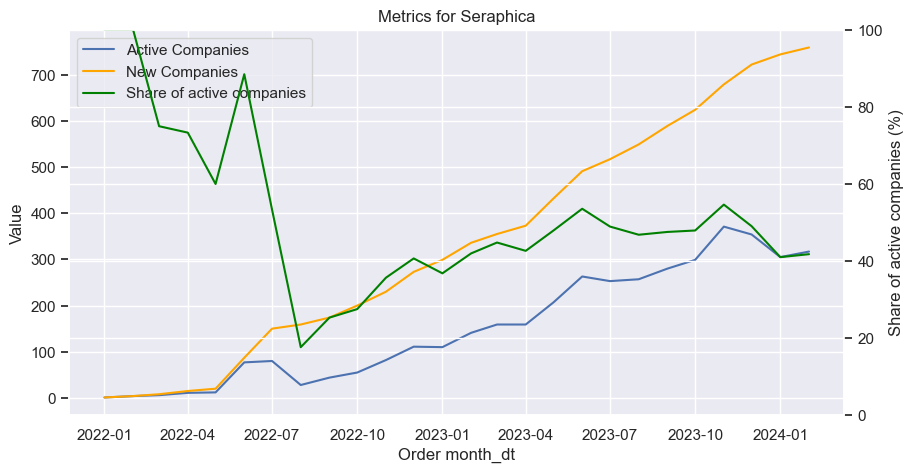

In [132]:
mask1 = df['Order month_dt'] < '2024-03'
mask2 = df['Region'] == 'Seraphica'
df2 = df.loc[mask1&mask2]

df2 = df2.groupby(['Region','Order month_dt'], as_index=False).agg({'Active Companies': 'sum', 'New Companies': 'sum'})
df2['New Companies'] = df2['New Companies'].cumsum()
df2['Share of active companies'] = df2['Active Companies']/df2['New Companies']*100.00

measure = 'Region'
metrics = ['Active Companies', 'New Companies','Share of active companies']
    
for region in df2[measure].unique():
    df_region = df2[df2[measure] == region]

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(data=df_region, x='Order month_dt', y='Active Companies', label='Active Companies', ax=ax)

    ax.plot(df_region['Order month_dt'], df_region['New Companies'], label='New Companies', color='orange')
    
    # Создание второй оси y
    ax2 = ax.twinx()
    ax2.plot(df_region['Order month_dt'], df_region['Share of active companies'], label='Share of active companies', color='green')
    
    # Конвертирование значений в проценты
    ax2.set_ylim(0, 100)
    ax2.set_ylabel('Share of active companies (%)')
    
    ax.set_title(f'Metrics for {region}')
    ax.set_ylabel('Value')
    ax.set_xlabel('Order month_dt')
    
    # Объединение легенд для обеих осей
    lines_1, labels_1 = ax.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')


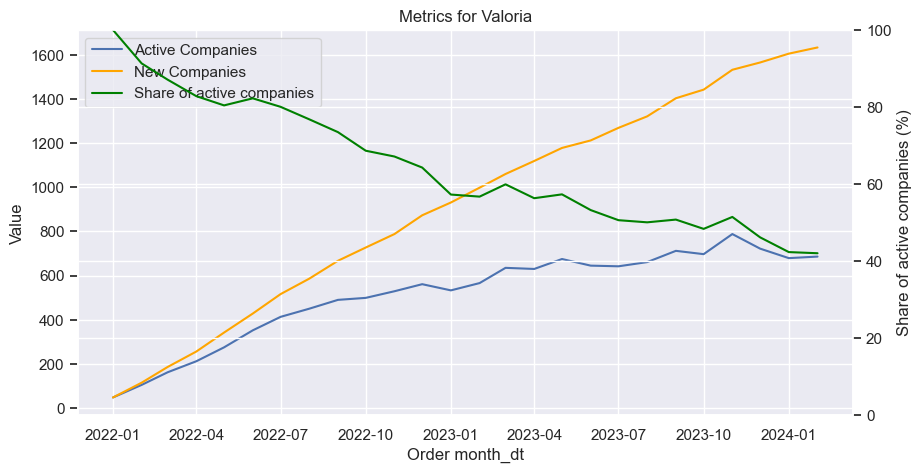

In [133]:
mask1 = df['Order month_dt'] < '2024-03'
mask2 = df['Region'] == 'Valoria'
df2 = df.loc[mask1&mask2]

df2 = df2.groupby(['Region','Order month_dt'], as_index=False).agg({'Active Companies': 'sum', 'New Companies': 'sum'})
df2['New Companies'] = df2['New Companies'].cumsum()
df2['Share of active companies'] = df2['Active Companies']/df2['New Companies']*100.00

measure = 'Region'
metrics = ['Active Companies', 'New Companies','Share of active companies']
    
for region in df2[measure].unique():
    df_region = df2[df2[measure] == region]

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(data=df_region, x='Order month_dt', y='Active Companies', label='Active Companies', ax=ax)

    ax.plot(df_region['Order month_dt'], df_region['New Companies'], label='New Companies', color='orange')
    
    # Создание второй оси y
    ax2 = ax.twinx()
    ax2.plot(df_region['Order month_dt'], df_region['Share of active companies'], label='Share of active companies', color='green')
    
    # Конвертирование значений в проценты
    ax2.set_ylim(0, 100)
    ax2.set_ylabel('Share of active companies (%)')
    
    ax.set_title(f'Metrics for {region}')
    ax.set_ylabel('Value')
    ax.set_xlabel('Order month_dt')
    
    # Объединение легенд для обеих осей
    lines_1, labels_1 = ax.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')


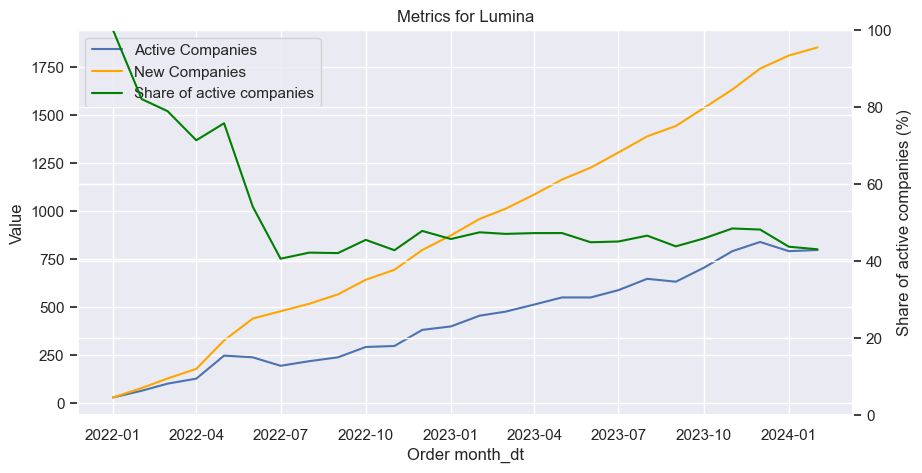

In [134]:
mask1 = df['Order month_dt'] < '2024-03'
mask2 = df['Region'] == 'Lumina'
df2 = df.loc[mask1&mask2]

df2 = df2.groupby(['Region','Order month_dt'], as_index=False).agg({'Active Companies': 'sum', 'New Companies': 'sum'})
df2['New Companies'] = df2['New Companies'].cumsum()
df2['Share of active companies'] = df2['Active Companies']/df2['New Companies']*100.00

measure = 'Region'
metrics = ['Active Companies', 'New Companies','Share of active companies']
    
for region in df2[measure].unique():
    df_region = df2[df2[measure] == region]

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(data=df_region, x='Order month_dt', y='Active Companies', label='Active Companies', ax=ax)

    ax.plot(df_region['Order month_dt'], df_region['New Companies'], label='New Companies', color='orange')
    
    # Создание второй оси y
    ax2 = ax.twinx()
    ax2.plot(df_region['Order month_dt'], df_region['Share of active companies'], label='Share of active companies', color='green')
    
    # Конвертирование значений в проценты
    ax2.set_ylim(0, 100)
    ax2.set_ylabel('Share of active companies (%)')
    
    ax.set_title(f'Metrics for {region}')
    ax.set_ylabel('Value')
    ax.set_xlabel('Order month_dt')
    
    # Объединение легенд для обеих осей
    lines_1, labels_1 = ax.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')


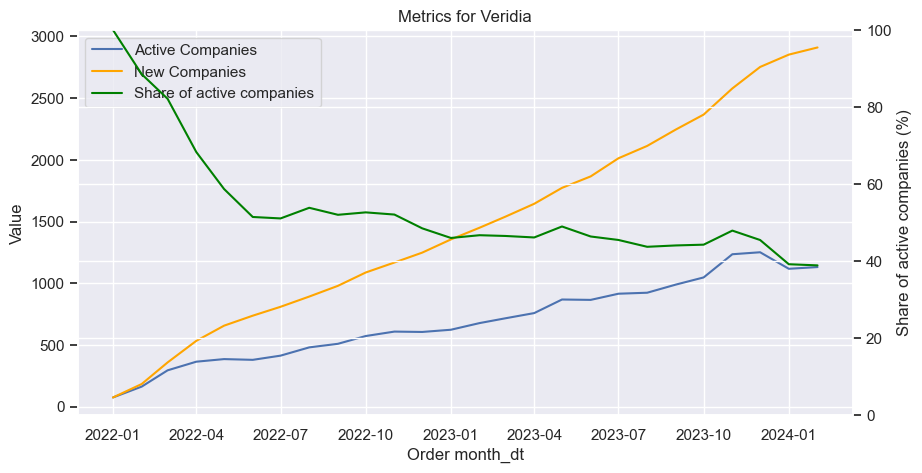

In [135]:
mask1 = df['Order month_dt'] < '2024-03'
mask2 = df['Region'] == 'Veridia'
df2 = df.loc[mask1&mask2]

df2 = df2.groupby(['Region','Order month_dt'], as_index=False).agg({'Active Companies': 'sum', 'New Companies': 'sum'})
df2['New Companies'] = df2['New Companies'].cumsum()
df2['Share of active companies'] = df2['Active Companies']/df2['New Companies']*100.00

measure = 'Region'
metrics = ['Active Companies', 'New Companies','Share of active companies']
    
for region in df2[measure].unique():
    df_region = df2[df2[measure] == region]

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(data=df_region, x='Order month_dt', y='Active Companies', label='Active Companies', ax=ax)

    ax.plot(df_region['Order month_dt'], df_region['New Companies'], label='New Companies', color='orange')
    
    # Создание второй оси y
    ax2 = ax.twinx()
    ax2.plot(df_region['Order month_dt'], df_region['Share of active companies'], label='Share of active companies', color='green')
    
    # Конвертирование значений в проценты
    ax2.set_ylim(0, 100)
    ax2.set_ylabel('Share of active companies (%)')
    
    ax.set_title(f'Metrics for {region}')
    ax.set_ylabel('Value')
    ax.set_xlabel('Order month_dt')
    
    # Объединение легенд для обеих осей
    lines_1, labels_1 = ax.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')


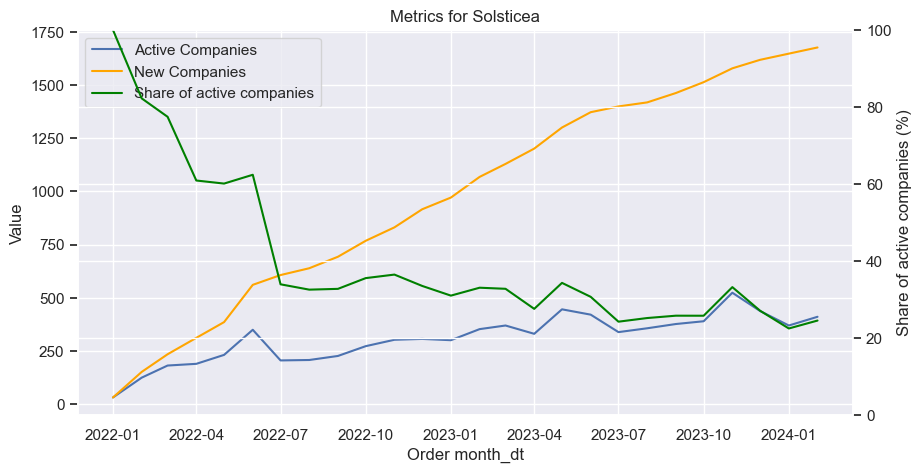

In [137]:
mask1 = df['Order month_dt'] < '2024-03'
mask2 = df['Region'] == 'Solsticea'
df2 = df.loc[mask1&mask2]

df2 = df2.groupby(['Region','Order month_dt'], as_index=False).agg({'Active Companies': 'sum', 'New Companies': 'sum'})
df2['New Companies'] = df2['New Companies'].cumsum()
df2['Share of active companies'] = df2['Active Companies']/df2['New Companies']*100.00

measure = 'Region'
metrics = ['Active Companies', 'New Companies','Share of active companies']
    
for region in df2[measure].unique():
    df_region = df2[df2[measure] == region]

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(data=df_region, x='Order month_dt', y='Active Companies', label='Active Companies', ax=ax)

    ax.plot(df_region['Order month_dt'], df_region['New Companies'], label='New Companies', color='orange')
    
    # Создание второй оси y
    ax2 = ax.twinx()
    ax2.plot(df_region['Order month_dt'], df_region['Share of active companies'], label='Share of active companies', color='green')
    
    # Конвертирование значений в проценты
    ax2.set_ylim(0, 100)
    ax2.set_ylabel('Share of active companies (%)')
    
    ax.set_title(f'Metrics for {region}')
    ax.set_ylabel('Value')
    ax.set_xlabel('Order month_dt')
    
    # Объединение легенд для обеих осей
    lines_1, labels_1 = ax.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')


# Data Insights

## Country Managers

### Key trends, insights, recommendations

#### Veridia

1. Excellent performance. Currently, it is the region with the highest number of new company acquisitions and the highest revenue, showing positive dynamics in both metrics.
2. Since the end of 2023, there may be a trend of decreasing the average number of orders per company. It is necessary to carefully examine these indicators.
3. It is necessary to study the best practices for activating newly acquired companies into active companies. To do this, we can examine the experience of the Seraphica and Novaria regions.

#### Aquilonia

1. One of the worst regional performances in the company. Previously, there was positive momentum, but since July 2023, the trend has turned negative.

2. It is necessary to analyze the reason for the departure of the "T0" segment company and develop possible steps for its return. Its departure cost the company $40,000 in revenue.

3. It is worth noting the very unstable dynamics in attracting new companies with decreasing effectiveness. It is advisable to use the experience of the "Veridia" region in attracting new companies and the regions of Seraphica and Novaria in their activation.

#### Lumina

1. One of the most stable regions in terms of key performance indicators.

2. It is worth noting the unstable dynamics in attracting new companies with stable activation efficiency. It is advisable to use the experience of the "Veridia" region in attracting new companies and the regions of Seraphica and Novaria in their activation.

3. It is worth looking for points of growth in the number of orders per company. To do this, you can use the experience of the regions "Novaria" and "Valoria".

#### Valoria

1. One of the worst regional performances in the company. Previously, there was positive dynamics, but since 07.2023, the trend has turned negative.
2. It is necessary to understand the reasons for the decrease in the average check in companies.
3. Let's discuss possible reasons for the sharp increase in the "Avg order cost" indicator from 11.2022 to 02.2023 in the "T4" segment in companies with the "Organic" acquisition channel.
4. It is worth noting the very unstable dynamics in attracting new companies with decreasing efficiency. It is advisable to use the experience of the "Veridia" region in attracting new companies and the regions of Seraphica and Novaria in their activation.

#### Solsticea

1. One of the worst regional performances in the company: the lowest revenue, the lowest number of orders.
2. It is worth noting the very unstable dynamics in attracting new companies with decreasing efficiency. At the same time, the activation efficiency is the lowest in the company. It is urgent to use the experience of the "Veridia" region in attracting new companies and the regions of Seraphica and Novaria in their activation.
3. It is also necessary to increase the number of orders per company. To do this, you can use the experience of the "Novaria" and "Valoria" regions.

#### Novaria


1. One of the most stable regions in terms of key performance indicators.
2. What explains the success in increasing the number of orders in the company in segments "T1" and "T0" until December 2023?
3. What were the practices in attracting customers until December 2023, and what stopped being done? Why did the activation level sharply decrease?

#### Seraphica

1. One of the most stable regions in terms of key performance indicators.
2. It is worth noting the positive dynamics in attracting new companies and in the growth of the number of orders per company.
3. It is also worth asking about the practices of attracting and activating companies in the region since August 2022, as this is the only region currently showing stable growth in this metric.

## Directors and VP

### Key trends and insights

1. It seems that the data for March 2024 is currently incomplete, so it needs to be excluded for analysis and insights discovery.
2. The overall trend of attracting new companies is highly volatile and tends to decline over the recent reporting periods.
3. There has been a significant drop in the 'Organic' acquisition channel since July 2022. At the same time, there has been an increase in the 'Outreach' acquisition channel from the same period.
4. Since February 2022, no new companies have been attracted to the 'T0' segment.
5. The 'Veridia' region consistently demonstrates high performance in attracting new companies and shows a trend towards further growth.
6. Two regions, 'Aquilonia' and 'Valoria', have shown negative revenue dynamics since Q3 2023.
7. The 'Veridia' region shows a strong positive trend in the growth of active companies and, consequently, in the overall revenue, while maintaining stable order metrics and average order price.
8. In the 'Aquilonia' region, since May 2023, the revenue trend has turned negative. It appears that the departure of a major company from the 'T0' segment may be the cause.
9. In the 'Novaria' region, since 05.2024, there has been an excellent trend of revenue growth due to the increase in the number of orders per company in the 'T1' and 'T0' segments, as well as the overall number of active companies in the 'T3' segment.
10. In the 'Valoria' region, from November 2022 to February 2023, there was a sharp spike in the 'Avg order cost' metric. This occurred due to a sudden increase in the metric within the 'T4' segment of companies with the 'Organic' acquisition channel. This issue needs to be thoroughly investigated: either it was an extremely successful company, or it was fraudulent activity, or it was a natural increase around the New Year holidays. It is worth noting that there is no such spike observed for the same period the following year. Apparently, this is not related to the New Year period after all.
11. In the 'T0' segment, there was steady growth across all metrics until May 2023, but after a company left the 'Aquilonia' region, there was a significant decline that has not been recovered to this day.
12. The 'Revenue per company' metric is highly volatile in the 'T0' segment in the 'Aquilonia' region. This is explained by the volatility of the total number of orders.
13. Overall, the company is experiencing a trend of revenue growth, with the 'Veridia' region driving this growth. However, two regions show negative dynamics: 'Valoria' and 'Aquilonia'.
In 'Aquilonia', the decline is attributed to the departure of a major client from the 'T0' segment, while in the 'Valoria' region, it is due to a decrease in the average order value.
14. In the region of "Novaria," one of the most effective methods for attracting new companies was consistently maintained, but the trend was disrupted in December 2023. The region of "Seraphica" is the only one with a positive trend in activating new companies into active users.
15. The departure of the company from the "Aquilonia" region cost the company 40,000 over 8 months (8 * 2,500), while the decrease in the order price in the "Valoria" region cost the company around 8,000.

### Insights and Recommendations

1. It's necessary to commend the excellent performance of the "Veridia" region, which has the highest number of new company acquisitions and the highest revenue, showing positive dynamics in both metrics.

2. The regions "Aquilonia" and "Valoria" should be highlighted as anti-leaders, as they are the only regions with negative revenue dynamics.

3. The reason for the company's departure from the "Aquilonia" region and the "T0" segment needs to be analyzed, and possible steps for its return should be developed.

4. Practices for attracting and activating companies in the "Novaria" region until December 2023 and in the "Seraphica" region since August 2022 need to be analyzed, and these recommendations should be extended to other companies.

5. The reasons for the decrease in the average check in companies in the "Valoria" region need to be investigated.

6. The reasons for the increase in the number of orders per company in the "T1" and "T0" segments in the "Novaria" region since May 2024 need to be analyzed in detail and extended to other regions and segments.

7. The sharp increase in the "Avg order cost" indicator in the "Valoria" region from November 2022 to February 2023 in the "T4" segment in companies with the "Organic" acquisition channel needs to be thoroughly investigated. If it was a successful campaign, it should be repeated regularly.

8. The reason why companies stopped being attracted from the "T0" segment needs to be understood.

9. The trend of attracting companies through the "Organic" channel, as the cheapest acquisition channel, has negative dynamics. The reasons for this need to be understood. Perhaps this acquisition channel was overtaken by the "Outreach" acquisition channel, as they show divergent trends from the same point in time.